In [1]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=bd2b4af78f2f0f510471682e67e02d3f92cf31dedee03da118c0cda1406d0c9d
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [93]:
from pyspark.sql import SparkSession


In [94]:
spark=SparkSession.builder.appName("mycourse").getOrCreate()

In [4]:
df=spark.read.csv("/content/drive/MyDrive/Colab Notebooks/movies.csv", header="True")

from pyspark.sql.types import *

# Define the custom schema
custom_schema = StructType([
    StructField("id", IntegerType(), True),
    StructField("title", StringType(), True),
    StructField("vote_average", FloatType(), True),
    StructField("vote_count", IntegerType(), True),
    StructField("status", StringType(), True),
    StructField("release_date", StringType(), True),
    StructField("revenue", LongType(), True),  # Using LongType for potentially large numbers
    StructField("runtime", IntegerType(), True),
    StructField("budget", LongType(), True),   # Using LongType for potentially large numbers
    StructField("original_language", StringType(), True),
    StructField("popularity", FloatType(), True),
    StructField("genres", StringType(), True),
    StructField("production_companies", StringType(), True),
    StructField("production_countries", StringType(), True),
    StructField("spoken_languages", StringType(), True)
])

In [5]:
data_path="/content/drive/MyDrive/Colab Notebooks/movies.csv"
df=spark.read.csv(data_path,schema=custom_schema, header="True")
df.show()

+------+--------------------+------------+----------+--------+------------+----------+-------+---------+-----------------+----------+--------------------+--------------------+--------------------+--------------------+
|    id|               title|vote_average|vote_count|  status|release_date|   revenue|runtime|   budget|original_language|popularity|              genres|production_companies|production_countries|    spoken_languages|
+------+--------------------+------------+----------+--------+------------+----------+-------+---------+-----------------+----------+--------------------+--------------------+--------------------+--------------------+
| 27205|           Inception|       8.364|     34495|Released|  15/07/2010| 825532764|    148|160000000|               en|    83.952|Action, Science F...|Legendary Picture...|United Kingdom, U...|English, French, ...|
|157336|        Interstellar|       8.417|     32571|Released|  05/11/2014| 701729206|    169|165000000|               en|   140

In [6]:
df.count()

395100

In [7]:
from pyspark.sql.functions import col
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.stat import Correlation
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from pyspark.sql.functions import col, count, when
from pyspark.sql.functions import to_date, min, max
from pyspark.sql.functions import count
from pyspark.sql.functions import year
from pyspark.sql.functions import floor
from pyspark.sql.functions import explode, split, col, sum
from pyspark.sql.functions import avg
from builtins import min, max

In [8]:
# Count nulls in 'id' and 'title' columns
nulls_in_id = df.filter(col("id").isNull()).count()
nulls_in_title = df.filter(col("title").isNull()).count()

# Display the count of nulls for each column
print("Number of null values in 'id':", nulls_in_id)
print("Number of null values in 'title':", nulls_in_title)

Number of null values in 'id': 46
Number of null values in 'title': 47


In [9]:
# Drop rows where either 'id' or 'title' is null
df = df.dropna(subset=["id", "title"])

# Verify the result by counting nulls again (optional)
new_nulls_in_id = df.filter(col("id").isNull()).count()
new_nulls_in_title = df.filter(col("title").isNull()).count()
print("New number of null values in 'id' after dropping:", new_nulls_in_id)
print("New number of null values in 'title' after dropping:", new_nulls_in_title)


New number of null values in 'id' after dropping: 0
New number of null values in 'title' after dropping: 0


In [10]:
df.count()

395053

In [11]:
# List of columns to check for null values
columns_to_check = ["vote_average", "vote_count", "status", "release_date", "runtime",
                    "budget", "original_language", "popularity", "genres", "production_companies",
                    "production_countries", "spoken_languages"]

# Count nulls in each specified column and print the results
for column in columns_to_check:
    null_count = df.filter(col(column).isNull()).count()
    print(f"Number of null values in '{column}':", null_count)


Number of null values in 'vote_average': 25
Number of null values in 'vote_count': 8
Number of null values in 'status': 1
Number of null values in 'release_date': 17782
Number of null values in 'runtime': 5
Number of null values in 'budget': 3
Number of null values in 'original_language': 1
Number of null values in 'popularity': 22
Number of null values in 'genres': 82746
Number of null values in 'production_companies': 150302
Number of null values in 'production_countries': 103426
Number of null values in 'spoken_languages': 89945


In [12]:
# Since production_companies, production_countries and spoken_languages have a lot of null values I will opt to keep them for now, because if I dont I am losing 38% of the data
#columns_to_check2 = ["vote_average", "vote_count", "status", "release_date", "runtime",
 #                   "budget", "original_language", "popularity", "genres"]

# Drop rows where any of the specified columns is null
df = df.dropna(subset=columns_to_check)

# Verify the result by counting nulls again (optional)
print("After removal of nulls:")
for column in columns_to_check:
    null_count = df.filter(col(column).isNull()).count()
    print(f"Number of null values in '{column}' after dropping:", null_count)


df.count()


After removal of nulls:
Number of null values in 'vote_average' after dropping: 0
Number of null values in 'vote_count' after dropping: 0
Number of null values in 'status' after dropping: 0
Number of null values in 'release_date' after dropping: 0
Number of null values in 'runtime' after dropping: 0
Number of null values in 'budget' after dropping: 0
Number of null values in 'original_language' after dropping: 0
Number of null values in 'popularity' after dropping: 0
Number of null values in 'genres' after dropping: 0
Number of null values in 'production_companies' after dropping: 0
Number of null values in 'production_countries' after dropping: 0
Number of null values in 'spoken_languages' after dropping: 0


191984

In [13]:
print("Data types of each column in the DataFrame:")
for column, dtype in df.dtypes:
    print(f"{column}: {dtype}")

Data types of each column in the DataFrame:
id: int
title: string
vote_average: float
vote_count: int
status: string
release_date: string
revenue: bigint
runtime: int
budget: bigint
original_language: string
popularity: float
genres: string
production_companies: string
production_countries: string
spoken_languages: string


In [14]:

# Convert 'release_date' from 'dd/MM/yy' string format to DateType, if not already done
df = df.withColumn("release_date", to_date(col("release_date"), "dd/MM/yyyy"))

# Extract the year from 'release_date' and create a new column 'year'
df = df.withColumn("year", year(col("release_date")))

# Filter the DataFrame to find all entries where the 'year' is 2027
entries_2027 = df.filter(col("year") == 2027)

# Show the entries
entries_2027.show()

+-------+--------------------+------------+----------+-------+------------+-------+-------+------+-----------------+----------+--------------------+--------------------+--------------------+----------------+----+
|     id|               title|vote_average|vote_count| status|release_date|revenue|runtime|budget|original_language|popularity|              genres|production_companies|production_countries|spoken_languages|year|
+-------+--------------------+------------+----------+-------+------------+-------+-------+------+-----------------+----------+--------------------+--------------------+--------------------+----------------+----+
|1003598|Avengers: Secret ...|         0.0|         0|Planned|  2027-05-06|      0|      0|     0|               en|    22.698|Action, Science F...|Marvel Studios, K...|United States of ...|         English|2027|
+-------+--------------------+------------+----------+-------+------------+-------+-------+------+-----------------+----------+--------------------+

In [15]:
# Find duplicates based on 'id' and 'title'
duplicates = df.groupBy("id", "title").agg(count("id").alias("count"))
duplicates = duplicates.filter(col("count") > 1)

# Show the duplicate entries
duplicates.show()
duplicates.count()

+---+-----+-----+
| id|title|count|
+---+-----+-----+
+---+-----+-----+



0

In [16]:
# Drop duplicates while keeping the first occurrence and reassign to 'df'
df = df.dropDuplicates(["id", "title"])

# Show the result to confirm duplicates are removed
df.show()
df.count()

+---+--------------------+------------+----------+--------+------------+---------+-------+---------+-----------------+----------+--------------------+--------------------+--------------------+--------------------+----+
| id|               title|vote_average|vote_count|  status|release_date|  revenue|runtime|   budget|original_language|popularity|              genres|production_companies|production_countries|    spoken_languages|year|
+---+--------------------+------------+----------+--------+------------+---------+-------+---------+-----------------+----------+--------------------+--------------------+--------------------+--------------------+----+
|  2|               Ariel|         7.1|       262|Released|  1988-10-21|        0|     73|        0|               fi|     8.155|Drama, Comedy, Ro...|Villealfa Filmpro...|             Finland|             Finnish|1988|
|  6|      Judgment Night|       6.533|       302|Released|  1993-10-15| 12136938|    109| 21000000|               en|    13

191984

In [17]:
# Group by the 'status' column and count occurrences
status_counts = df.groupBy("status").agg(count("status").alias("count"))

# Show the count and names of different statuses
status_counts.show()


+---------------+------+
|         status| count|
+---------------+------+
|       Released|191761|
|  In Production|    68|
|        Planned|    32|
|Post Production|   122|
|       Canceled|     1|
+---------------+------+



In [18]:
# Filter DataFrame for entries where status is 'Released'
released_df = df.filter(col("status") == "Released")

# Count entries where 'revenue' is zero
zero_revenue_count = released_df.filter(col("revenue") == 0).count()
print("Number of 'Released' entries with zero revenue:", zero_revenue_count)

# Count entries where 'runtime' is zero
zero_runtime_count = released_df.filter(col("runtime") == 0).count()
print("Number of 'Released' entries with zero runtime:", zero_runtime_count)

# Count entries where 'budget' is zero
zero_budget_count = released_df.filter(col("budget") == 0).count()
print("Number of 'Released' entries with zero budget:", zero_budget_count)

# Count entries where 'popularity' is zero
zero_popularity_count = released_df.filter(col("popularity") == 0).count()
print("Number of 'Released' entries with zero popularity:", zero_popularity_count)


Number of 'Released' entries with zero revenue: 176808
Number of 'Released' entries with zero runtime: 14946
Number of 'Released' entries with zero budget: 171950
Number of 'Released' entries with zero popularity: 950


In [19]:
# Filter to remove entries with zero values in specified columns when status is 'Released'
df = df.filter(
    (col("status") != "Released") |
    ((col("status") == "Released") &
     (col("revenue") != 0) &
     (col("runtime") != 0) &
     (col("budget") != 0) &
     (col("popularity") != 0))
)

# Optionally, you can show or verify the DataFrame to see the changes
df.show()
df.count()

+---+--------------------+------------+----------+--------+------------+---------+-------+---------+-----------------+----------+--------------------+--------------------+--------------------+--------------------+----+
| id|               title|vote_average|vote_count|  status|release_date|  revenue|runtime|   budget|original_language|popularity|              genres|production_companies|production_countries|    spoken_languages|year|
+---+--------------------+------------+----------+--------+------------+---------+-------+---------+-----------------+----------+--------------------+--------------------+--------------------+--------------------+----+
|  6|      Judgment Night|       6.533|       302|Released|  1993-10-15| 12136938|    109| 21000000|               en|    13.564|Action, Crime, Th...|Largo Entertainme...|United States of ...|             English|1993|
| 11|           Star Wars|       8.204|     19155|Released|  1977-05-25|775398007|    121| 11000000|               en|    88

9801

In [20]:
# Create a 'decade' column by flooring the 'year' to the nearest decade
df = df.withColumn("decade", (floor(df["year"] / 10) * 10))

# Aggregate to count movies per decade
movies_per_decade = df.groupBy("decade").count().withColumnRenamed("count", "num_movies").orderBy("decade")

# Collect the data for plotting
movies_per_decade_data = movies_per_decade.collect()

# Extract decades and movie counts for plotting
decades = [row['decade'] for row in movies_per_decade_data]
num_movies = [row['num_movies'] for row in movies_per_decade_data]

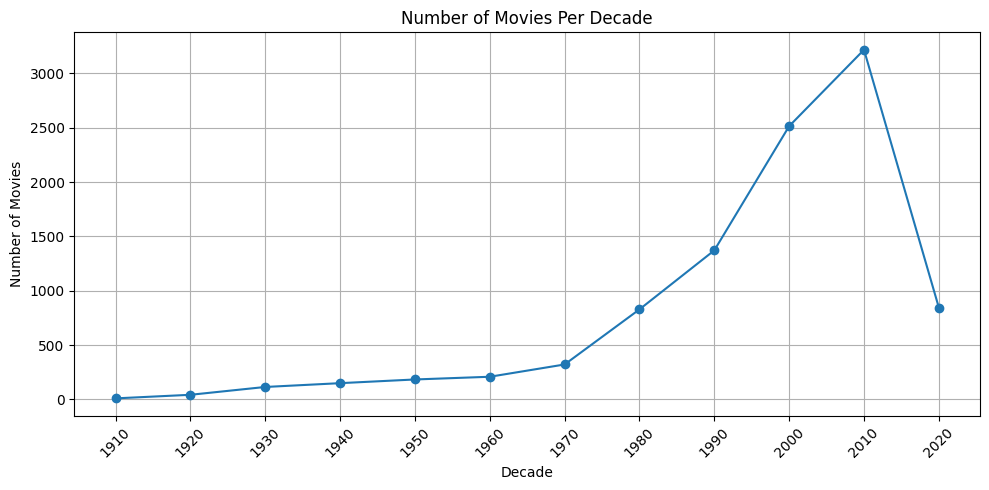

In [21]:
# Create the plot
plt.figure(figsize=(10, 5))
plt.plot(decades, num_movies, marker='o', linestyle='-')
plt.title('Number of Movies Per Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Movies')
plt.grid(True)

# Set x-axis to show every decade
# Calculate the range of decades from the minimum decade to the maximum decade
start_decade = min(decades)
end_decade = max(decades) + 10  # Extend to include the last decade in range
plt.xticks(range(start_decade, end_decade, 10))  # Set ticks to each decade

plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels

# Show the plot
plt.show()


In [22]:
# Group by 'year' and count the number of movies
movies_per_year = df.groupBy("year").agg(count("id").alias("num_movies"))

# Order by 'year' for the plot
movies_per_year_ordered = movies_per_year.orderBy("year")


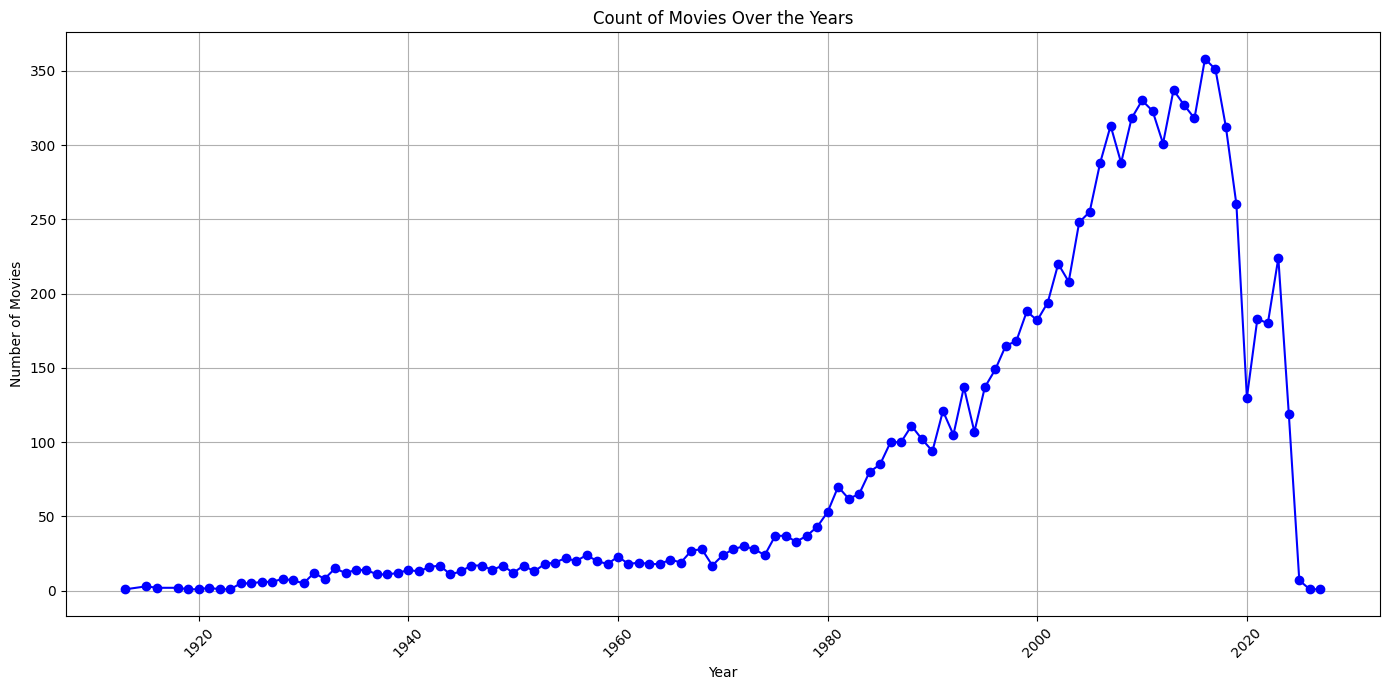

In [23]:
# Collect the data for plotting
movies_per_year_data = movies_per_year_ordered.collect()

years = [row['year'] for row in movies_per_year_data]
num_movies = [row['num_movies'] for row in movies_per_year_data]

plt.figure(figsize=(14, 7))
plt.plot(years, num_movies, marker='o', linestyle='-', color='b')
plt.title('Count of Movies Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [24]:
# Get the top 20 years with the most movies
top_20_years = movies_per_year.orderBy(col("num_movies").desc()).limit(20)

# Collect this data for display or use
top_20_years_data = top_20_years.collect()
top_20_list = [(row['year'], row['num_movies']) for row in top_20_years_data]

# Print the list of top 20 years with the number of movies
for year, count in top_20_list:
    print(f"Year: {year}, Number of Movies: {count}")


Year: 2016, Number of Movies: 358
Year: 2017, Number of Movies: 351
Year: 2013, Number of Movies: 337
Year: 2010, Number of Movies: 330
Year: 2014, Number of Movies: 327
Year: 2011, Number of Movies: 323
Year: 2015, Number of Movies: 318
Year: 2009, Number of Movies: 318
Year: 2007, Number of Movies: 313
Year: 2018, Number of Movies: 312
Year: 2012, Number of Movies: 301
Year: 2006, Number of Movies: 288
Year: 2008, Number of Movies: 288
Year: 2019, Number of Movies: 260
Year: 2005, Number of Movies: 255
Year: 2004, Number of Movies: 248
Year: 2023, Number of Movies: 224
Year: 2002, Number of Movies: 220
Year: 2003, Number of Movies: 208
Year: 2001, Number of Movies: 194


In [25]:
# Add a new column 'profit' which is the difference between 'revenue' and 'budget'
df = df.withColumn("profit", col("revenue") - col("budget"))

# Show the DataFrame to verify the new 'profit' column
df.show()


+---+--------------------+------------+----------+--------+------------+---------+-------+---------+-----------------+----------+--------------------+--------------------+--------------------+--------------------+----+------+---------+
| id|               title|vote_average|vote_count|  status|release_date|  revenue|runtime|   budget|original_language|popularity|              genres|production_companies|production_countries|    spoken_languages|year|decade|   profit|
+---+--------------------+------------+----------+--------+------------+---------+-------+---------+-----------------+----------+--------------------+--------------------+--------------------+--------------------+----+------+---------+
|  6|      Judgment Night|       6.533|       302|Released|  1993-10-15| 12136938|    109| 21000000|               en|    13.564|Action, Crime, Th...|Largo Entertainme...|United States of ...|             English|1993|  1990| -8863062|
| 11|           Star Wars|       8.204|     19155|Releas

In [26]:
print("Data types of each column in the DataFrame:")
for column, dtype in df.dtypes:
    print(f"{column}: {dtype}")

Data types of each column in the DataFrame:
id: int
title: string
vote_average: float
vote_count: int
status: string
release_date: date
revenue: bigint
runtime: int
budget: bigint
original_language: string
popularity: float
genres: string
production_companies: string
production_countries: string
spoken_languages: string
year: int
decade: bigint
profit: bigint


In [27]:
# Split the 'genres' column into an array of genres, then explode it
df_exploded = df.withColumn("genre", explode(split(col("genres"), ",\s*")))

# Group by 'genre' and sum the 'popularity' for each genre
genre_popularity = df_exploded.groupBy("genre").agg(sum("popularity").alias("total_popularity"))
# Sort the DataFrame by 'total_popularity' in descending order
genre_popularity = genre_popularity.orderBy(col("total_popularity").desc())

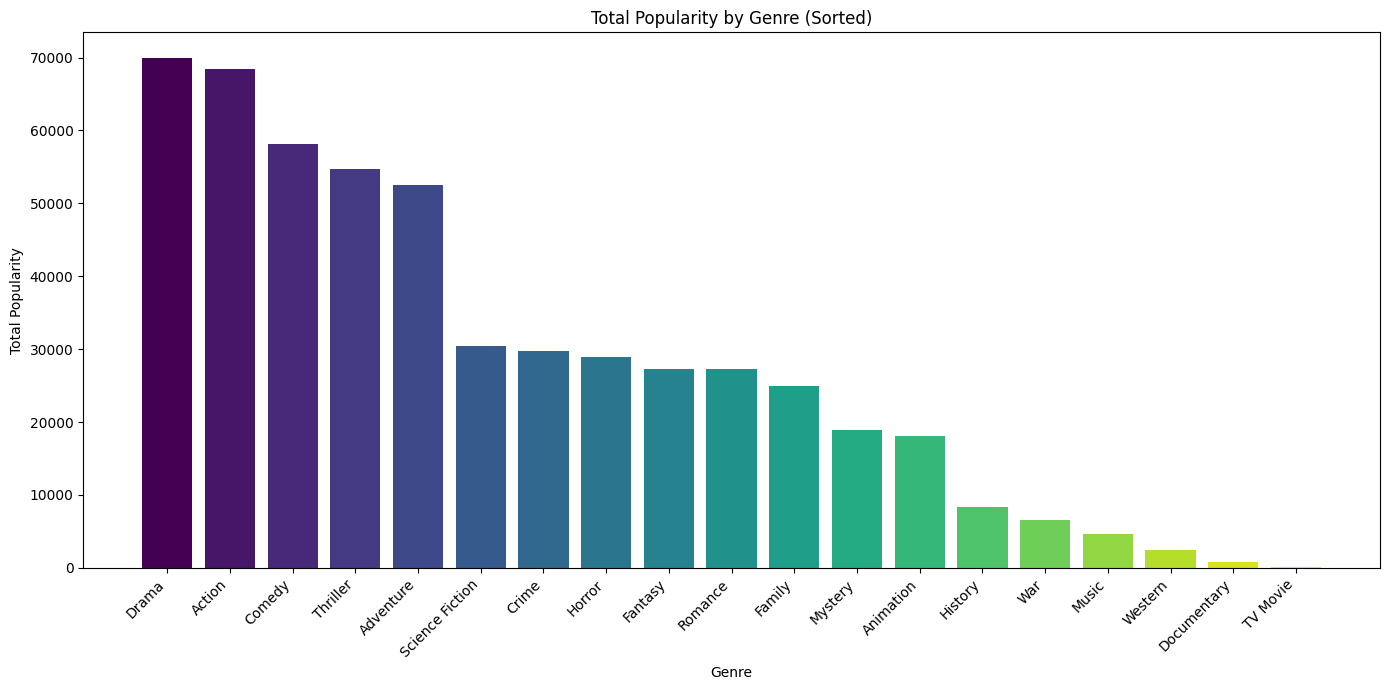

In [28]:
# Collect the data for plotting after sorting
genre_popularity_data = genre_popularity.collect()

# Prepare data for plotting
genres = [row['genre'] for row in genre_popularity_data]
total_popularity = [row['total_popularity'] for row in genre_popularity_data]

# Generate a color map or a list of colors
colors = plt.cm.viridis(np.linspace(0, 1, len(genres)))

# Create the bar plot with different colors for each genre
plt.figure(figsize=(14, 7))
plt.bar(genres, total_popularity, color=colors)
plt.title('Total Popularity by Genre (Sorted)')
plt.xlabel('Genre')
plt.ylabel('Total Popularity')
plt.xticks(rotation=45, ha="right")  # Rotate the genre labels for better readability
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels

# Show the plot
plt.show()


In [29]:
# Split the 'genres' column into an array of genres, then explode it
df_exploded = df.withColumn("genre", explode(split(col("genres"), ",\s*")))

# Group by 'genre' and count the number of movies per genre
genre_counts = df_exploded.groupBy("genre").count().withColumnRenamed("count", "num_movies")

# Sort the result by 'num_movies' in descending order for better visualization
genre_counts = genre_counts.orderBy(col("num_movies").desc())


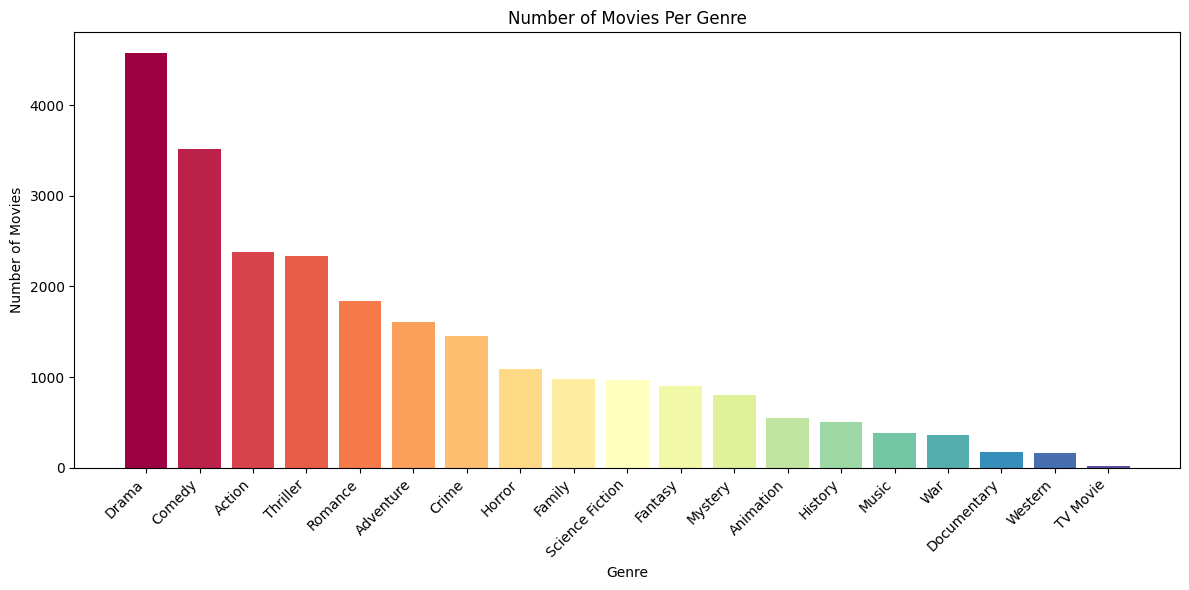

In [30]:
# Collect the data for plotting
genre_count_data = genre_counts.collect()
# Prepare data for plotting
genres = [row['genre'] for row in genre_count_data]
num_movies = [row['num_movies'] for row in genre_count_data]

# Generate a list of colors, one for each genre
colors = plt.cm.Spectral(np.linspace(0, 1, len(genres)))

# Create the bar plot
plt.figure(figsize=(12, 6))
plt.bar(genres, num_movies, color=colors)
plt.title('Number of Movies Per Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha="right")  # Rotate the genre labels for better readability
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels

# Show the plot
plt.show()


In [31]:
# Split the 'genres' column into an array of genres, then explode it
df_exploded = df.withColumn("genre", explode(split(col("genres"), ",\s*")))

# Group by 'genre' and calculate the average popularity
genre_average_popularity = df_exploded.groupBy("genre").agg(avg("popularity").alias("average_popularity"))

# Sort the result by 'average_popularity' in descending order for a better visualization
genre_average_popularity = genre_average_popularity.orderBy(col("average_popularity").desc())

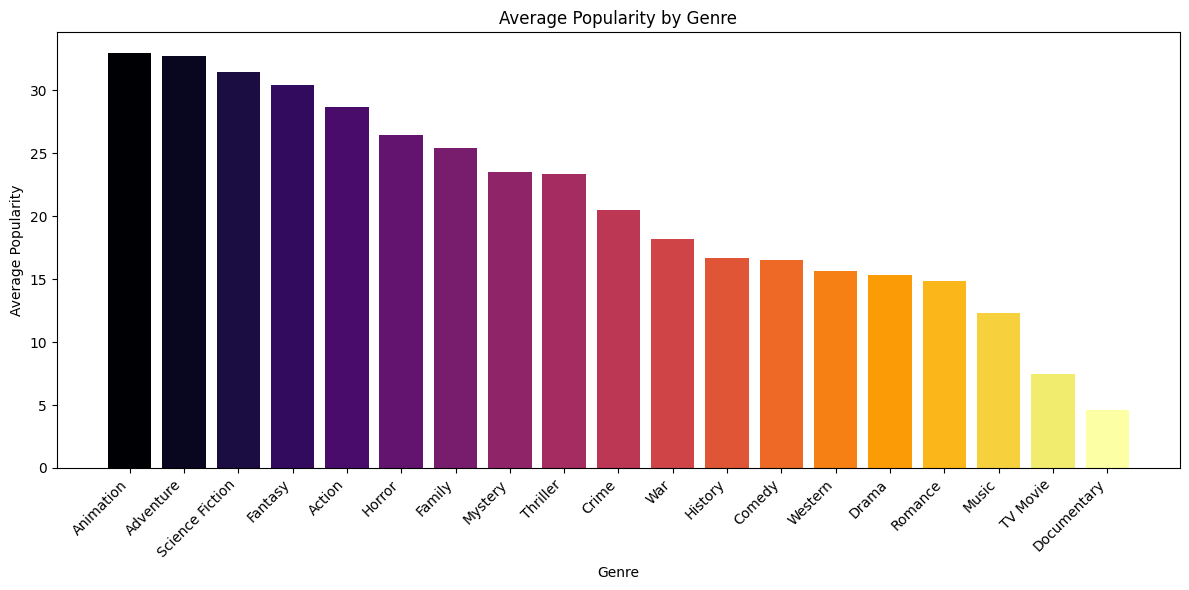

In [32]:
# Collect the data for plotting
genre_average_popularity_data = genre_average_popularity.collect()

# Prepare data for plotting
genres = [row['genre'] for row in genre_average_popularity_data]
average_popularity = [row['average_popularity'] for row in genre_average_popularity_data]

# Generate a list of colors, one for each genre
colors = plt.cm.inferno(np.linspace(0, 1, len(genres)))

# Create the bar plot
plt.figure(figsize=(12, 6))
plt.bar(genres, average_popularity, color=colors)
plt.title('Average Popularity by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Popularity')
plt.xticks(rotation=45, ha="right")  # Rotate the genre labels for better readability
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels

# Show the plot
plt.show()

In [33]:
# Split the 'genres' column into an array of genres, then explode it
df_exploded = df.withColumn("genre", explode(split(col("genres"), ",\s*")))

# Group by 'genre' and calculate the average revenue
genre_average_revenue = df_exploded.groupBy("genre").agg(avg("revenue").alias("average_revenue"))

# Sort the result by 'average_revenue' in descending order for better visualization
genre_average_revenue = genre_average_revenue.orderBy(col("average_revenue").desc())

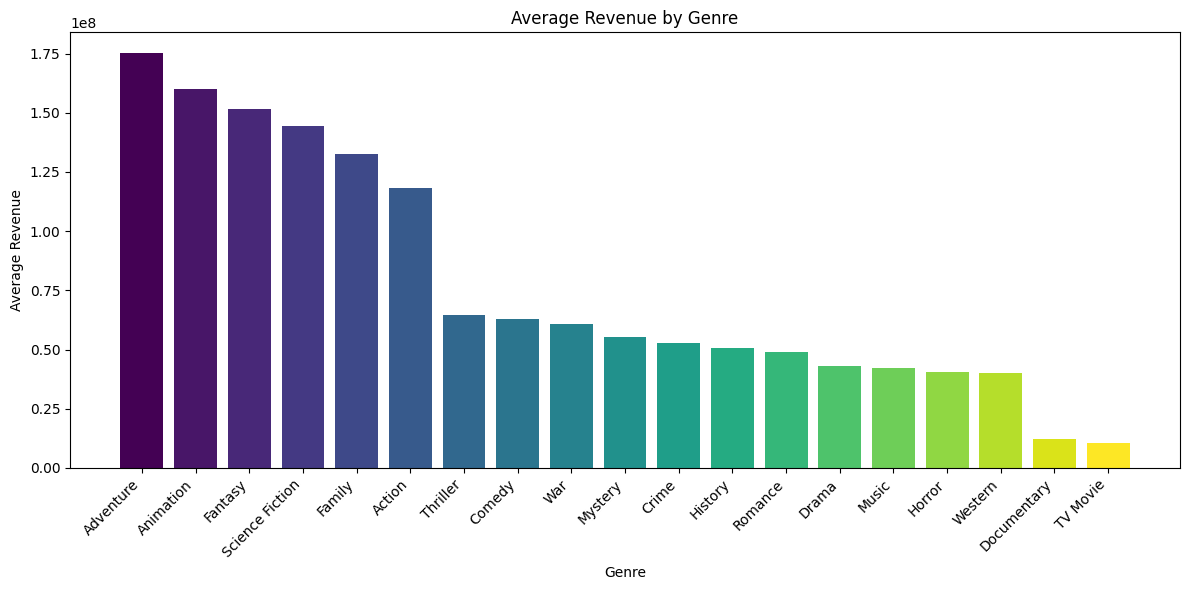

In [34]:
# Collect the data for plotting
genre_average_revenue_data = genre_average_revenue.collect()

# Prepare data for plotting
genres = [row['genre'] for row in genre_average_revenue_data]
average_revenue = [row['average_revenue'] for row in genre_average_revenue_data]

# Generate a list of colors, one for each genre
colors = plt.cm.viridis(np.linspace(0, 1, len(genres)))

# Create the bar plot
plt.figure(figsize=(12, 6))
plt.bar(genres, average_revenue, color=colors)
plt.title('Average Revenue by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Revenue')
plt.xticks(rotation=45, ha="right")  # Rotate the genre labels for better readability
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels

# Show the plot
plt.show()

In [35]:
# Split the 'genres' column into an array of genres, then explode it
df_exploded = df.withColumn("genre", explode(split(col("genres"), ",\s*")))

# Group by 'genre' and calculate the average budget
genre_average_budget = df_exploded.groupBy("genre").agg(avg("budget").alias("average_budget"))

# Sort the result by 'average_budget' in descending order for better visualization
genre_average_budget = genre_average_budget.orderBy(col("average_budget").desc())

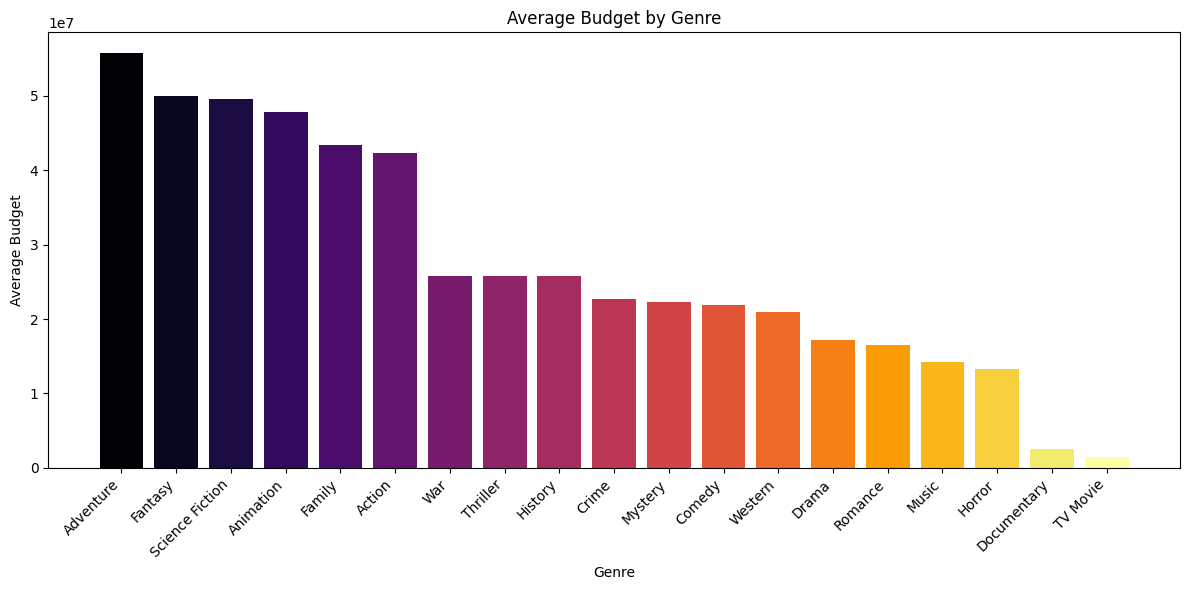

In [36]:
# Collect the data for plotting
genre_average_budget_data = genre_average_budget.collect()

# Prepare data for plotting
genres = [row['genre'] for row in genre_average_budget_data]
average_budget = [row['average_budget'] for row in genre_average_budget_data]

# Generate a list of colors, one for each genre
colors = plt.cm.inferno(np.linspace(0, 1, len(genres)))

# Create the bar plot
plt.figure(figsize=(12, 6))
plt.bar(genres, average_budget, color=colors)
plt.title('Average Budget by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Budget')
plt.xticks(rotation=45, ha="right")  # Rotate the genre labels for better readability
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels

# Show the plot
plt.show()

In [37]:
# Split the 'genres' column into an array of genres, then explode it
df_exploded = df.withColumn("genre", explode(split(col("genres"), ",\s*")))

# Group by 'genre' and calculate the average profit
genre_average_profit = df_exploded.groupBy("genre").agg(avg("profit").alias("average_profit"))

# Sort the result by 'average_profit' in descending order for better visualization
genre_average_profit = genre_average_profit.orderBy(col("average_profit").desc())

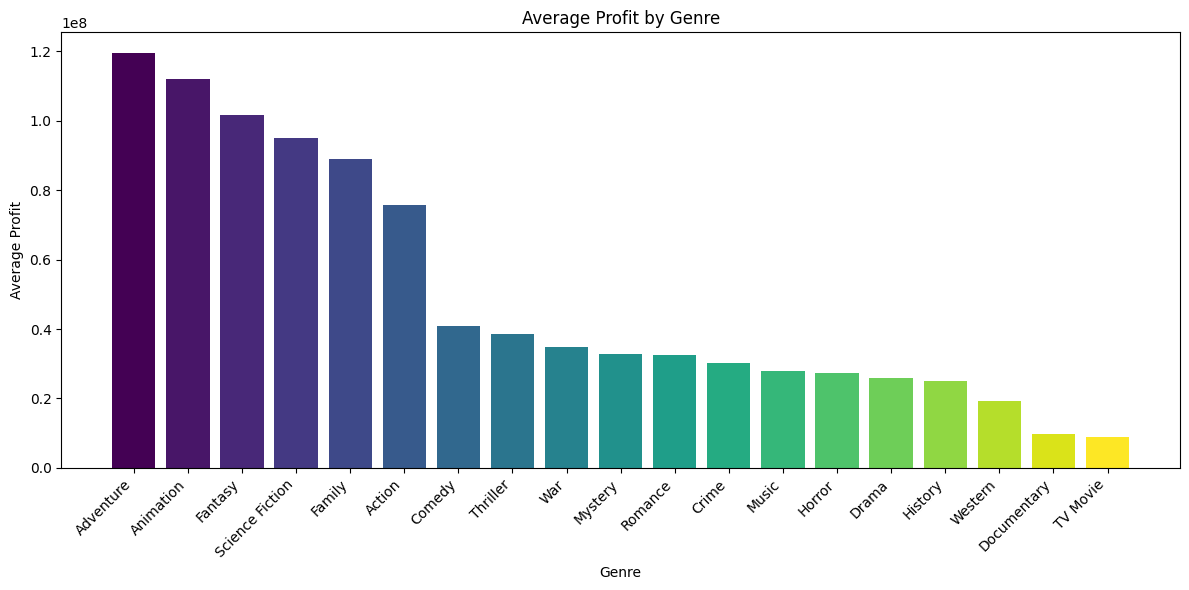

In [38]:
# Collect the data for plotting
genre_average_profit_data = genre_average_profit.collect()

# Prepare data for plotting
genres = [row['genre'] for row in genre_average_profit_data]
average_profit = [row['average_profit'] for row in genre_average_profit_data]

# Generate a list of colors, one for each genre
colors = plt.cm.viridis(np.linspace(0, 1, len(genres)))

# Create the bar plot
plt.figure(figsize=(12, 6))
plt.bar(genres, average_profit, color=colors)
plt.title('Average Profit by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Profit')
plt.xticks(rotation=45, ha="right")  # Rotate the genre labels for better readability
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels

# Show the plot
plt.show()

In [39]:
# Split the 'genres' column into an array of genres, then explode it
df_exploded = df.withColumn("genre", explode(split(col("genres"), ",\s*")))

# Group by 'genre' and calculate the average vote count
genre_average_vote_count = df_exploded.groupBy("genre").agg(avg("vote_count").alias("average_vote_count"))

# Sort the result by 'average_vote_count' in descending order for better visualization
genre_average_vote_count = genre_average_vote_count.orderBy(col("average_vote_count").desc())


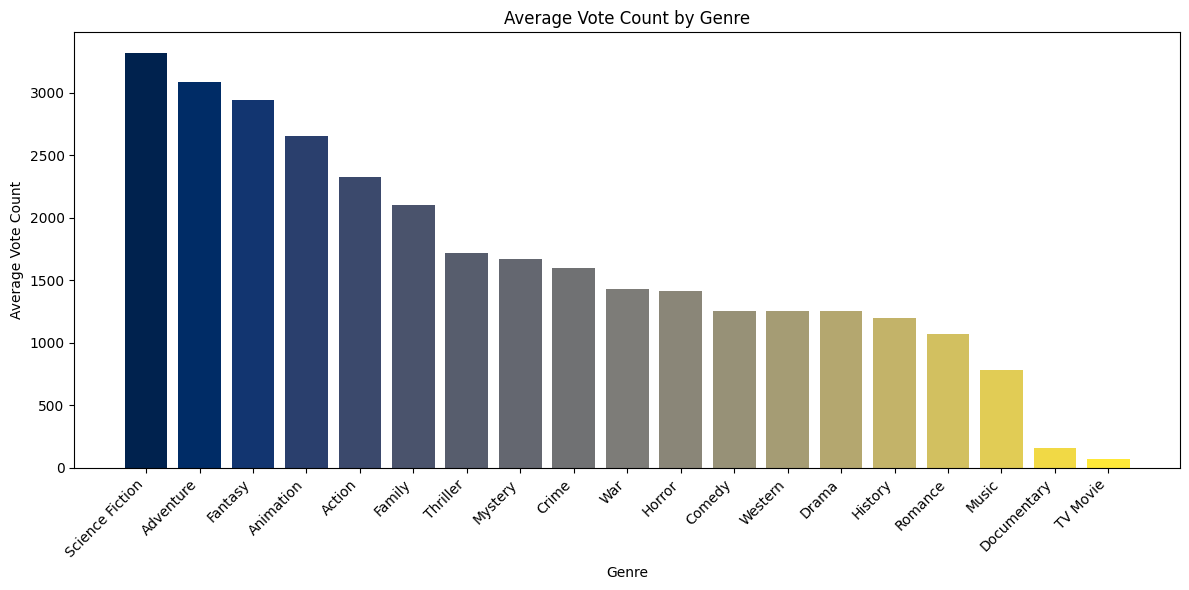

In [40]:
# Collect the data for plotting
genre_average_vote_count_data = genre_average_vote_count.collect()

# Prepare data for plotting
genres = [row['genre'] for row in genre_average_vote_count_data]
average_vote_counts = [row['average_vote_count'] for row in genre_average_vote_count_data]

# Generate a list of colors, one for each genre
colors = plt.cm.cividis(np.linspace(0, 1, len(genres)))

# Create the bar plot
plt.figure(figsize=(12, 6))
plt.bar(genres, average_vote_counts, color=colors)
plt.title('Average Vote Count by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Vote Count')
plt.xticks(rotation=45, ha="right")  # Rotate the genre labels for better readability
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels

# Show the plot
plt.show()

In [41]:
from pyspark.sql.functions import count
from pyspark.sql.functions import avg, count, max, min

# Split the 'genres' column into an array of genres, then explode it
df_exploded = df.withColumn("genre", explode(split(col("genres"), ",\s*")))

# Group by 'genre' and calculate the necessary metrics
genre_aggregates = df_exploded.groupBy("genre").agg(
    avg("popularity").alias("average_popularity"),
    avg("profit").alias("average_profit"),
    avg("vote_count").alias("average_vote_count"),
    avg("vote_average").alias("average_vote_average"),
    count("id").alias("movie_count")
)

# Collect the max and min for each metric to use for normalization
max_min_stats = genre_aggregates.select(
    max("average_popularity"), min("average_popularity"),
    max("average_profit"), min("average_profit"),
    max("average_vote_count"), min("average_vote_count"),
    max("average_vote_average"), min("average_vote_average"),
    max("movie_count"), min("movie_count")
).collect()[0]

In [42]:
# Apply min-max normalization
def normalize(value, max_value, min_value):
    return (value - min_value) / (max_value - min_value) if max_value > min_value else 0

genre_aggregates = genre_aggregates.withColumn("norm_popularity", normalize(col("average_popularity"), max_min_stats[0], max_min_stats[1]))
genre_aggregates = genre_aggregates.withColumn("norm_profit", normalize(col("average_profit"), max_min_stats[2], max_min_stats[3]))
genre_aggregates = genre_aggregates.withColumn("norm_vote_count", normalize(col("average_vote_count"), max_min_stats[4], max_min_stats[5]))
genre_aggregates = genre_aggregates.withColumn("norm_vote_average", normalize(col("average_vote_average"), max_min_stats[6], max_min_stats[7]))
genre_aggregates = genre_aggregates.withColumn("norm_movie_count", normalize(col("movie_count"), max_min_stats[8], max_min_stats[9]))

# Calculate overall score by averaging normalized scores
genre_aggregates = genre_aggregates.withColumn("overall_score",
                                               (col("norm_popularity") +
                                                col("norm_profit") +
                                                col("norm_vote_count") +
                                                col("norm_vote_average") +
                                                col("norm_movie_count")) / 5)


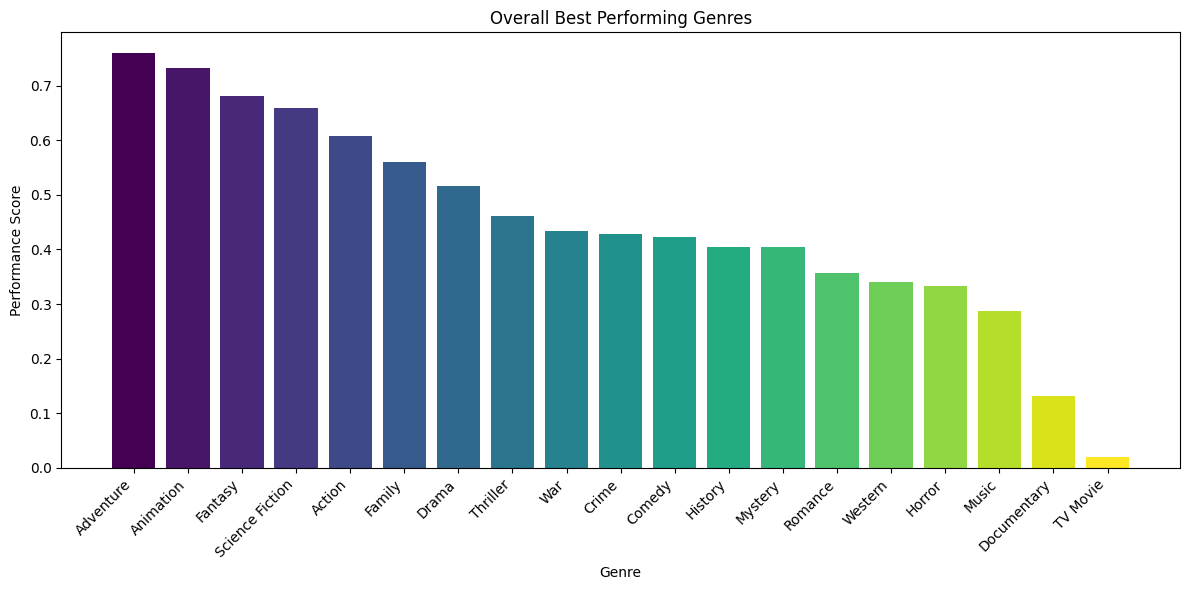

In [43]:
# Collect the data for plotting
genre_performance_data = genre_aggregates.select("genre", "overall_score").orderBy("overall_score", ascending=False).collect()

# Prepare data for plotting
genres = [row['genre'] for row in genre_performance_data]
overall_scores = [row['overall_score'] for row in genre_performance_data]

# Create the bar plot
plt.figure(figsize=(12, 6))
colors = plt.cm.viridis(np.linspace(0, 1, len(genres)))  # Generate a color for each genre
plt.bar(genres, overall_scores, color=colors)
plt.title('Overall Best Performing Genres')
plt.xlabel('Genre')
plt.ylabel('Performance Score')
plt.xticks(rotation=45, ha="right")  # Rotate the genre labels for better readability
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels

# Show the plot
plt.show()


In [44]:
# Split the 'production_companies' column into an array of companies, then explode it
df_exploded = df.withColumn("company", explode(split(col("production_companies"), ",\s*")))

# Group by 'company' and sum the 'profit'
company_profit = df_exploded.groupBy("company").agg(sum("profit").alias("total_profit"))

# Sort the result by 'total_profit' in descending order and get the top 10
top_companies = company_profit.orderBy(col("total_profit").desc()).limit(10)


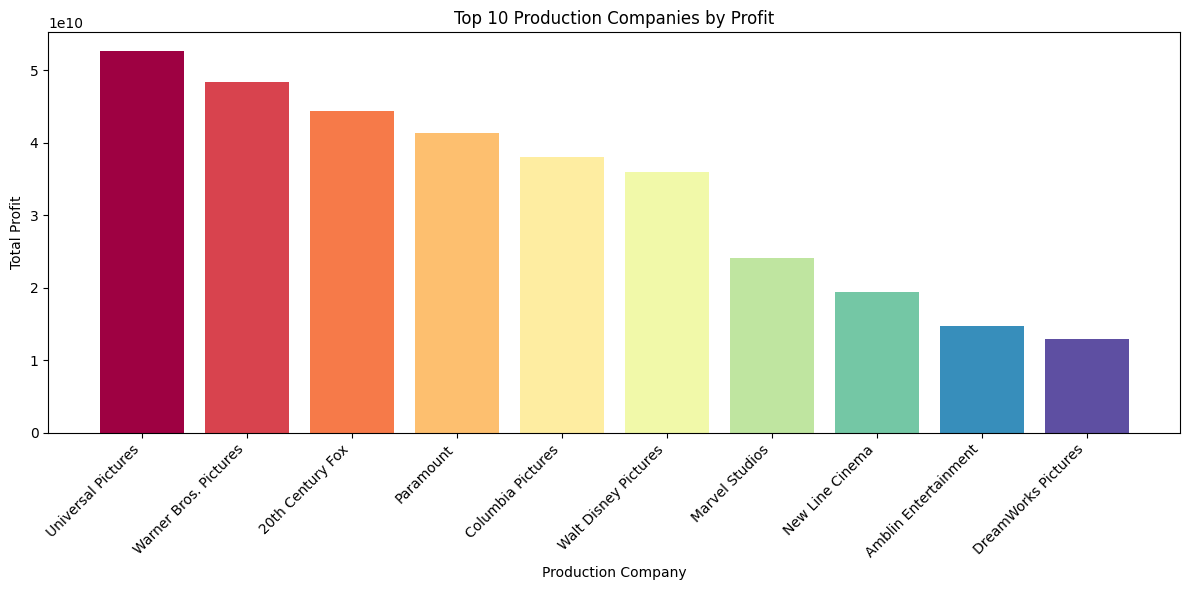

In [45]:
# Collect the data for plotting
top_companies_data = top_companies.collect()

# Prepare data for plotting
companies = [row['company'] for row in top_companies_data]
total_profits = [row['total_profit'] for row in top_companies_data]

# Create the bar plot
plt.figure(figsize=(12, 6))
colors = plt.cm.Spectral(np.linspace(0, 1, len(companies)))  # Generate vibrant, distinct colors
plt.bar(companies, total_profits, color=colors)
plt.title('Top 10 Production Companies by Profit')
plt.xlabel('Production Company')
plt.ylabel('Total Profit')
plt.xticks(rotation=45, ha="right")  # Rotate the company labels for better readability
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels

# Show the plot
plt.show()


In [46]:
from pyspark.sql.functions import col

# Sort the DataFrame by 'profit' in descending order and get the top 10
top_10_movies_by_profit = df.orderBy(col("profit").desc()).limit(10)

# Collect the data for plotting
top_10_movies_data = top_10_movies_by_profit.collect()

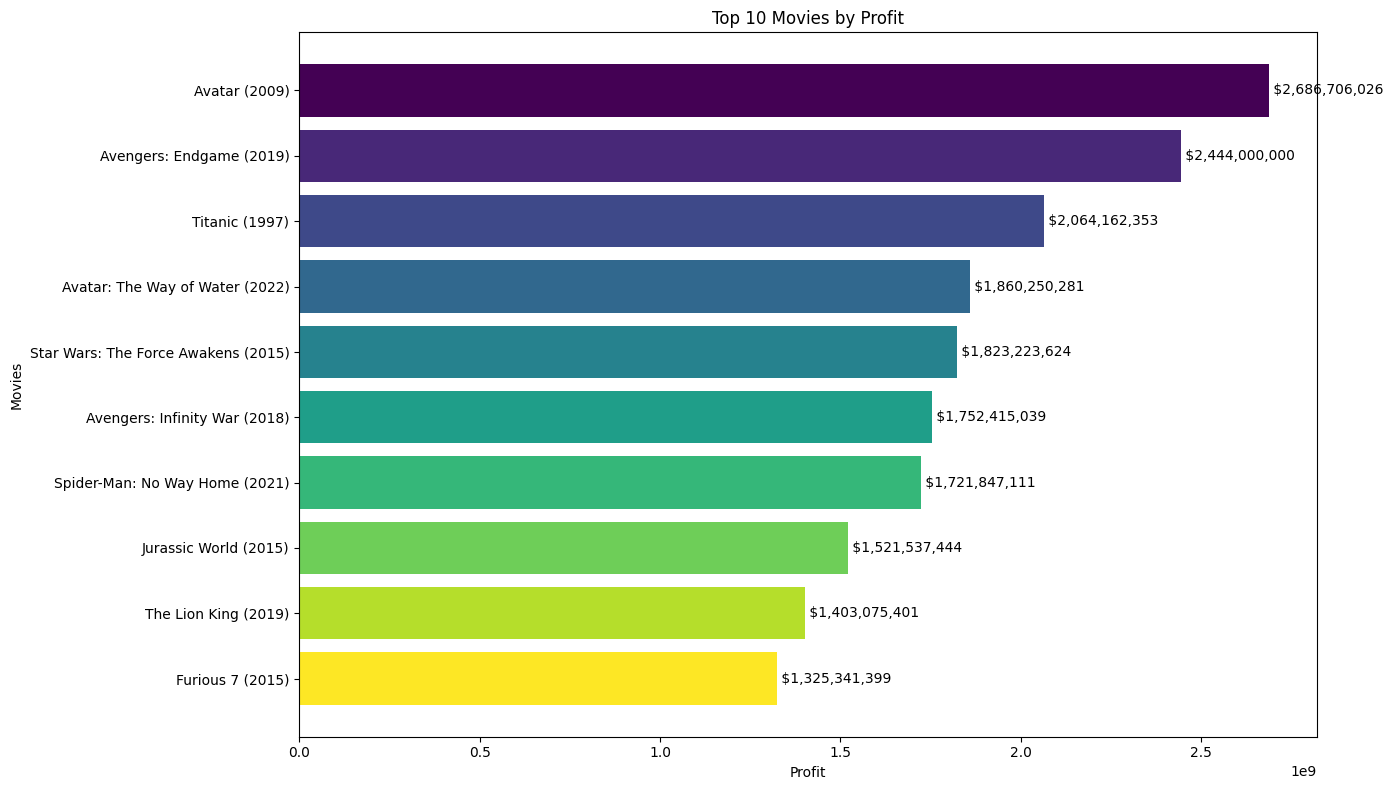

In [47]:
# Prepare data for plotting
movies = [f"{row['title']} ({row['year']})" for row in top_10_movies_data]  # Include year in the label
profits = [row['profit'] for row in top_10_movies_data]

# Create a color array with a unique color for each movie
colors = plt.cm.viridis(np.linspace(0, 1, len(movies)))

# Create the horizontal bar plot
plt.figure(figsize=(14, 8))
bars = plt.barh(movies, profits, color=colors)
plt.title('Top 10 Movies by Profit')
plt.xlabel('Profit')
plt.ylabel('Movies')

# Annotate each bar with the profit value for better readability
for bar, profit in zip(bars, profits):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f' ${int(profit):,}',
             va='center', ha='left')

plt.gca().invert_yaxis()  # Invert the y-axis to have the top movie at the top
plt.tight_layout()  # Adjust layout to make room for the labels
plt.show()

In [48]:
# Sort the DataFrame by 'popularity' in descending order and get the top 10
top_10_movies_by_popularity = df.orderBy(col("popularity").desc()).limit(10)

# Collect the data for plotting
top_10_movies_data = top_10_movies_by_popularity.collect()

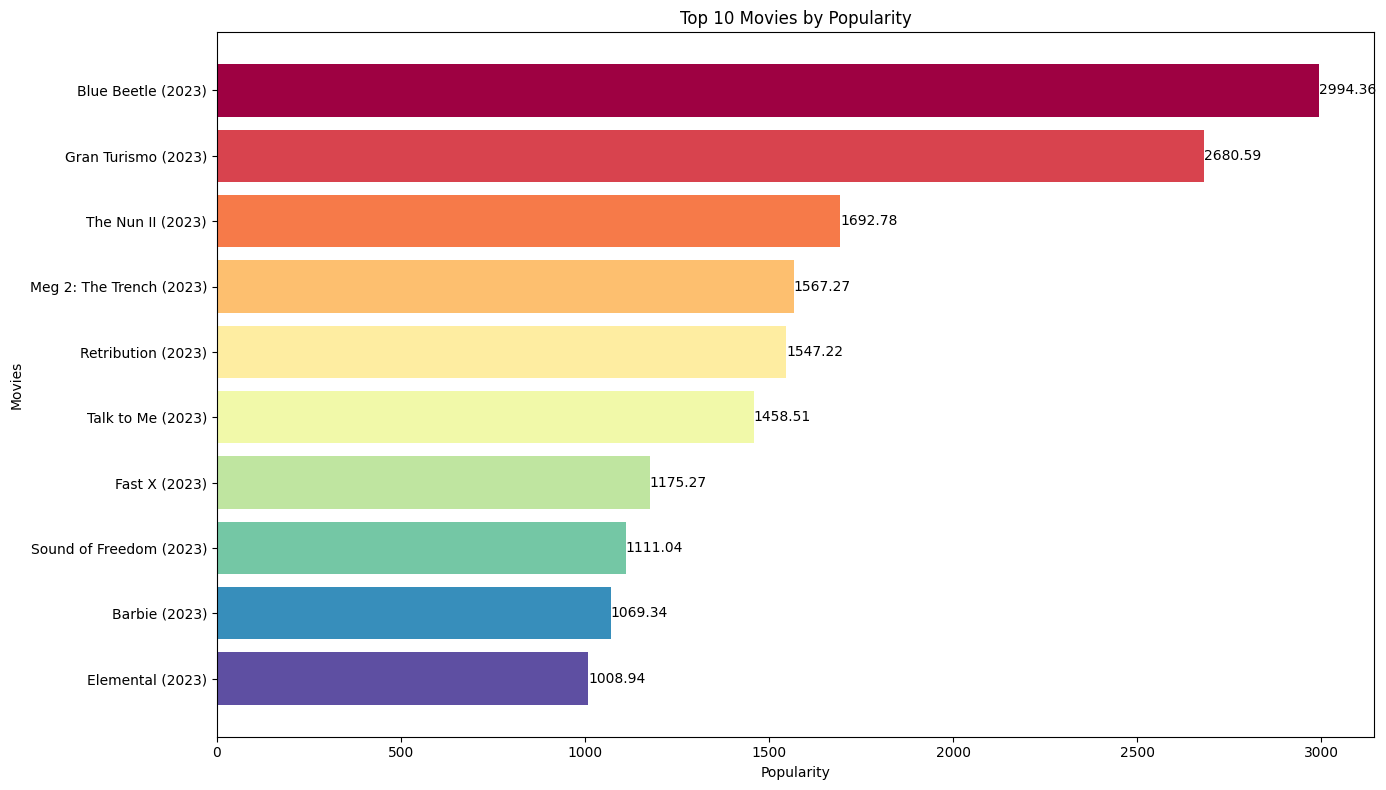

In [49]:
# Prepare data for plotting
movies = [f"{row['title']} ({row['year']})" for row in top_10_movies_data]  # Include year in the label
popularity = [row['popularity'] for row in top_10_movies_data]

# Create a color array with a unique color for each movie
colors = plt.cm.Spectral(np.linspace(0, 1, len(movies)))

# Create the horizontal bar plot
plt.figure(figsize=(14, 8))
bars = plt.barh(movies, popularity, color=colors)
plt.title('Top 10 Movies by Popularity')
plt.xlabel('Popularity')
plt.ylabel('Movies')

# Annotate each bar with the popularity value for better readability
for bar, value in zip(bars, popularity):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{value:.2f}',
             va='center', ha='left')

plt.gca().invert_yaxis()  # Invert the y-axis to have the top movie at the top
plt.tight_layout()  # Adjust layout to make room for the labels
plt.show()

In [50]:
# Sort the DataFrame by 'vote_count' in descending order and get the top 10
top_10_movies_by_vote_count = df.orderBy(col("vote_count").desc()).limit(10)

# Collect the data for plotting
top_10_movies_data = top_10_movies_by_vote_count.collect()

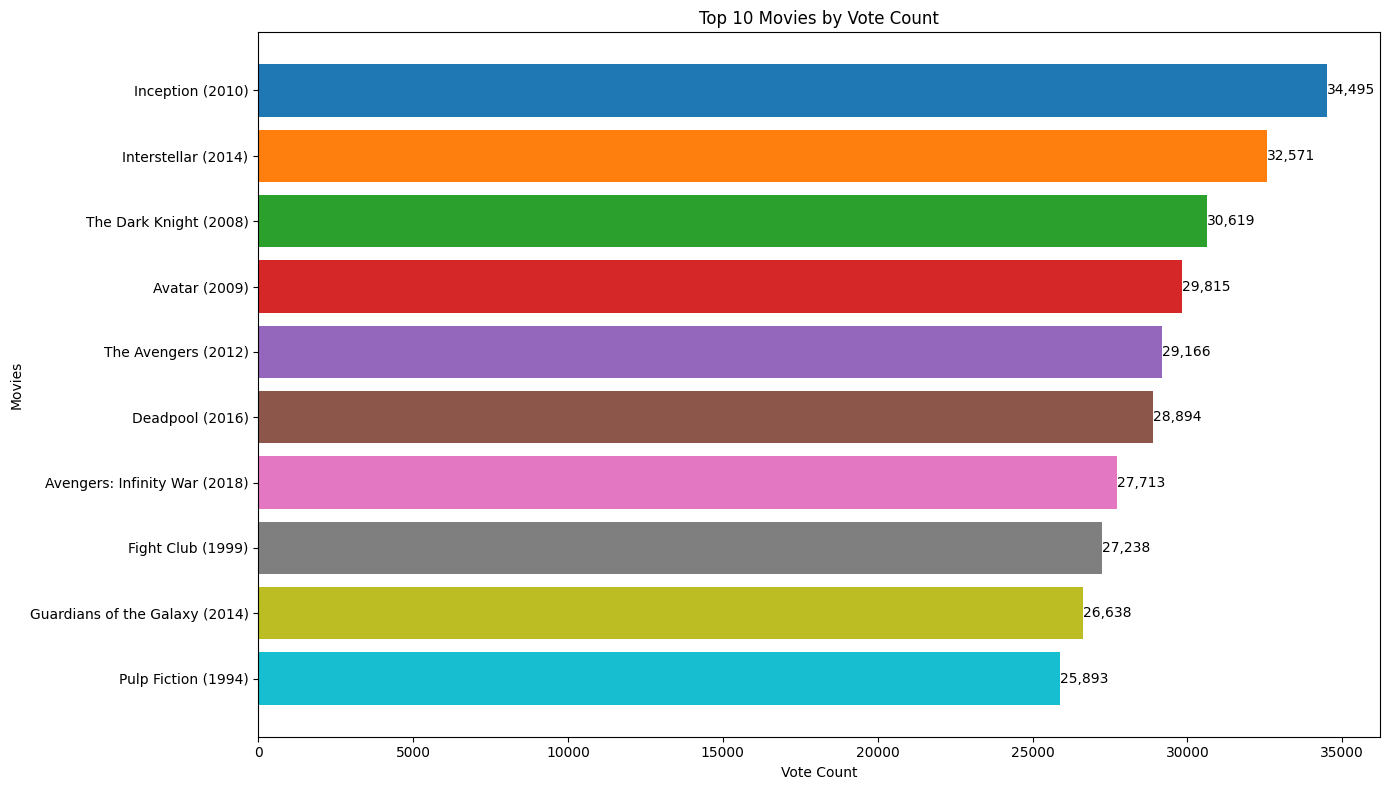

In [51]:
# Prepare data for plotting
movies = [f"{row['title']} ({row['year']})" for row in top_10_movies_data]  # Include year in the label
vote_counts = [row['vote_count'] for row in top_10_movies_data]

# Create a color array with a unique color for each movie
colors = plt.cm.tab10(np.linspace(0, 1, len(movies)))

# Create the horizontal bar plot
plt.figure(figsize=(14, 8))
bars = plt.barh(movies, vote_counts, color=colors)
plt.title('Top 10 Movies by Vote Count')
plt.xlabel('Vote Count')
plt.ylabel('Movies')

# Annotate each bar with the vote count for better readability
for bar, value in zip(bars, vote_counts):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{int(value):,}',
             va='center', ha='left')

plt.gca().invert_yaxis()  # Invert the y-axis to have the top movie at the top
plt.tight_layout()  # Adjust layout to make room for the labels
plt.show()


In [52]:
# Sort the DataFrame by 'vote_average' in descending order and get the top 10
top_10_movies_by_vote_average = df.orderBy(col("vote_average").desc()).limit(10)

# Collect the data for plotting
top_10_movies_data = top_10_movies_by_vote_average.collect()

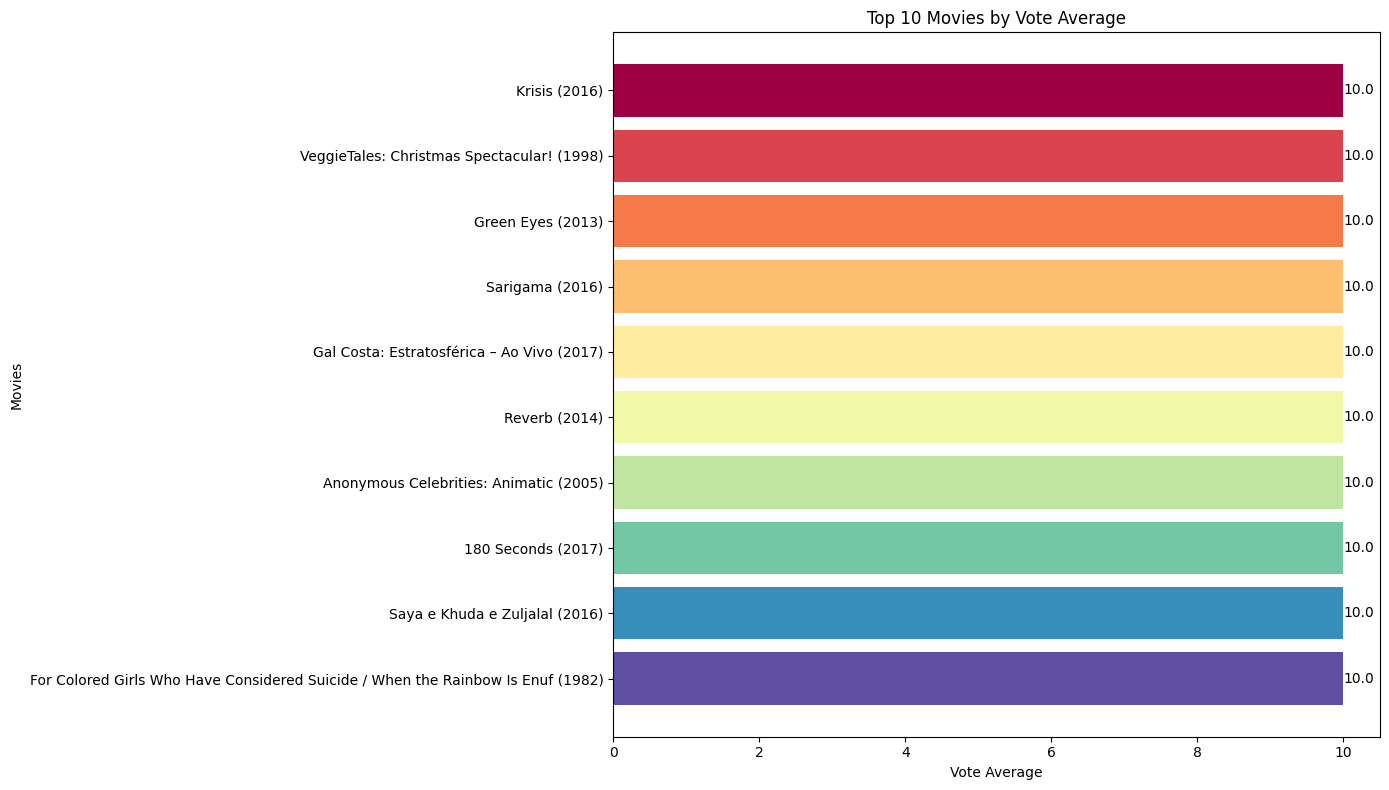

In [53]:
# Prepare data for plotting
movies = [f"{row['title']} ({row['year']})" for row in top_10_movies_data]  # Include year in the label
vote_averages = [row['vote_average'] for row in top_10_movies_data]

# Create a color array with a unique color for each movie
colors = plt.cm.Spectral(np.linspace(0, 1, len(movies)))

# Create the horizontal bar plot
plt.figure(figsize=(14, 8))
bars = plt.barh(movies, vote_averages, color=colors)
plt.title('Top 10 Movies by Vote Average')
plt.xlabel('Vote Average')
plt.ylabel('Movies')

# Annotate each bar with the vote average for better readability
for bar, value in zip(bars, vote_averages):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{value:.1f}',
             va='center', ha='left')

plt.gca().invert_yaxis()  # Invert the y-axis to have the top movie at the top
plt.tight_layout()  # Adjust layout to make room for the labels
plt.show()


In [54]:
# Calculate the average vote count across all movies
average_vote_count = df.agg(avg(col("vote_count"))).first()[0]

# Filter out movies with fewer votes than the average
filtered_df = df.filter(col("vote_count") >= average_vote_count)

# Sort the DataFrame by 'vote_average' in descending order and get the top 10
top_10_movies_by_vote_average = filtered_df.orderBy(col("vote_average").desc()).limit(10)

# Collect the data for plotting
top_10_movies_data = top_10_movies_by_vote_average.collect()


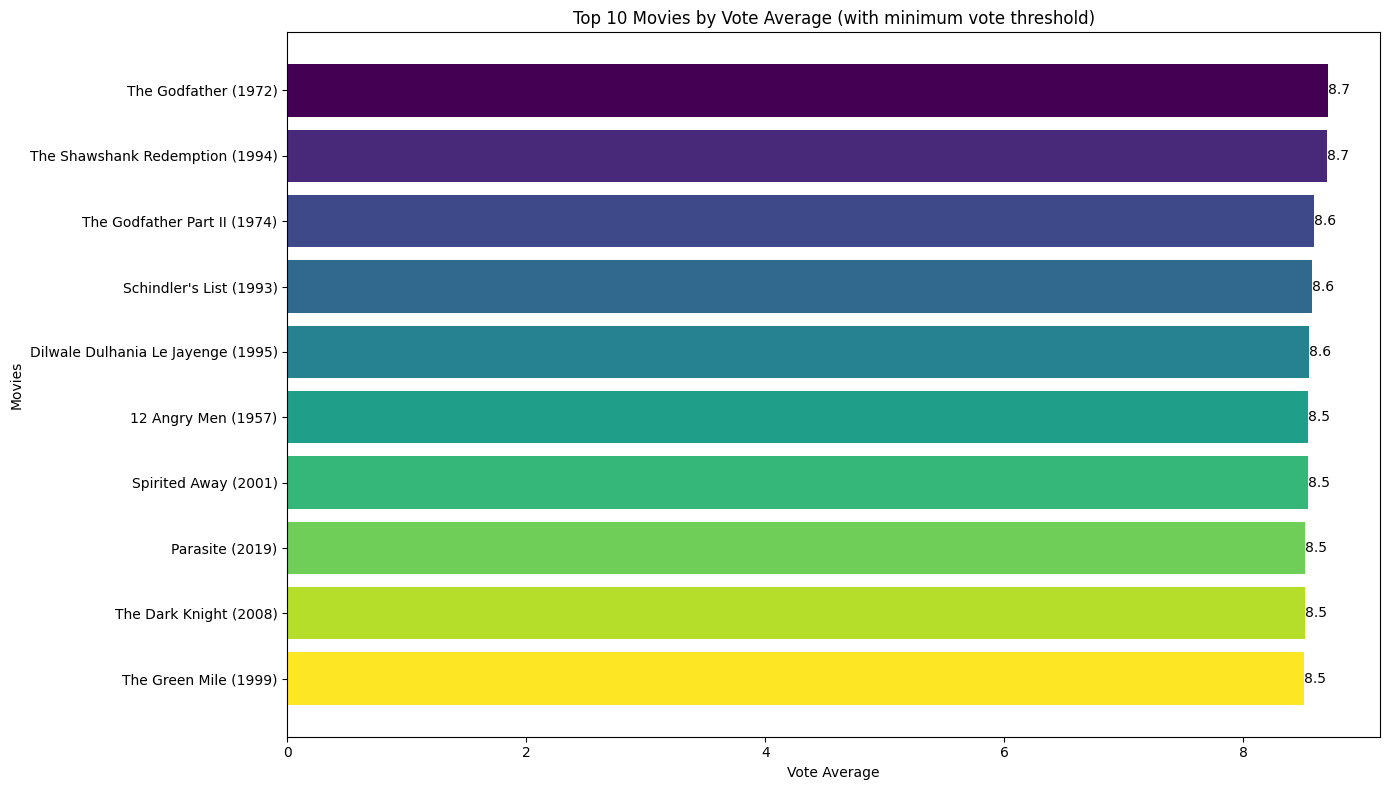

In [55]:
# Prepare data for plotting
movies = [f"{row['title']} ({row['year']})" for row in top_10_movies_data]  # Include year in the label
vote_averages = [row['vote_average'] for row in top_10_movies_data]

# Create a color array with a unique color for each movie
colors = plt.cm.viridis(np.linspace(0, 1, len(movies)))

# Create the horizontal bar plot
plt.figure(figsize=(14, 8))
bars = plt.barh(movies, vote_averages, color=colors)
plt.title('Top 10 Movies by Vote Average (with minimum vote threshold)')
plt.xlabel('Vote Average')
plt.ylabel('Movies')

# Annotate each bar with the vote average for better readability
for bar, value in zip(bars, vote_averages):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{value:.1f}',
             va='center', ha='left')

plt.gca().invert_yaxis()  # Invert the y-axis to have the top movie at the top
plt.tight_layout()  # Adjust layout to make room for the labels
plt.show()


In [56]:
from pyspark.sql.functions import col, udf
from pyspark.sql.types import DoubleType

# Calculate the mean vote across all movies (C)
C = df.agg({"vote_average": "avg"}).collect()[0][0]

# Set the minimum votes required (M)
# This could be a percentile or a specific value based on distribution. Let's say the 90th percentile.
M = df.approxQuantile("vote_count", [0.9], 0.0)[0]

# Define the weighted rating UDF
def weighted_rating(v, R, M=M, C=C):
    return (v / (v + M) * R) + (M / (M + v) * C)

# Register UDF
weighted_rating_udf = udf(weighted_rating, DoubleType())

# Create a new column 'score' using the weighted rating formula
df = df.withColumn("score", weighted_rating_udf(col("vote_count"), col("vote_average")))

# Get the top 10 movies by score
top_10_movies_by_score = df.orderBy(col("score").desc()).limit(10)

# Collect the data for plotting
top_10_movies_data = top_10_movies_by_score.collect()


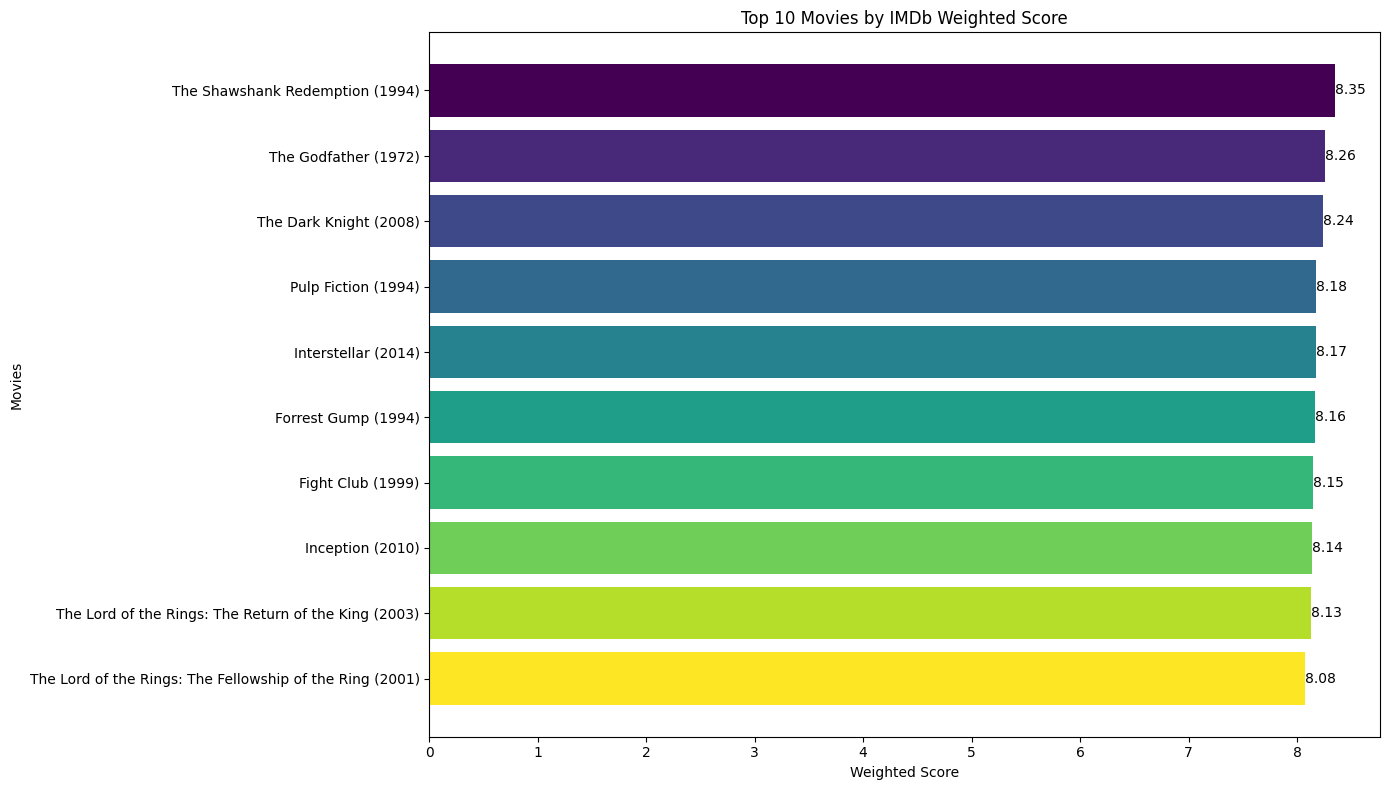

In [57]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare data for plotting
movies = [f"{row['title']} ({row['year']})" for row in top_10_movies_data]
scores = [row['score'] for row in top_10_movies_data]

# Create a color array with a unique color for each movie
colors = plt.cm.viridis(np.linspace(0, 1, len(movies)))

# Create the horizontal bar plot
plt.figure(figsize=(14, 8))
bars = plt.barh(movies, scores, color=colors)
plt.title('Top 10 Movies by IMDb Weighted Score')
plt.xlabel('Weighted Score')
plt.ylabel('Movies')

# Annotate each bar with the score for better readability
for bar, value in zip(bars, scores):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{value:.2f}',
             va='center', ha='left')

plt.gca().invert_yaxis()  # Invert the y-axis to have the top movie at the top
plt.tight_layout()  # Adjust layout to make room for the labels
plt.show()


In [58]:
from pyspark.sql.functions import when, col

# Create a new column 'duration_bin' based on runtime categories
df = df.withColumn(
    "duration_bin",
    when(col("runtime") < 90, "Less than 1.5 hours")
    .when((col("runtime") >= 90) & (col("runtime") < 150), "Between 1.5 - 2.5 hours")
    .otherwise("More than 2.5 hours")
)
# Group by the 'duration_bin' and count the number of movies
duration_counts = df.groupBy("duration_bin").count().orderBy("count", ascending=False)

# Collect the data for plotting
duration_counts_data = duration_counts.collect()


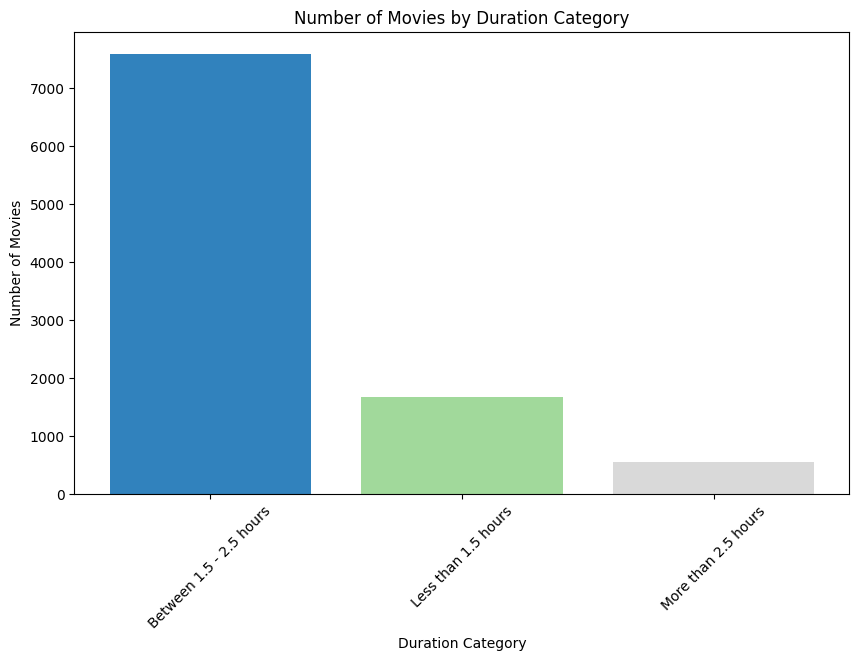

In [59]:
import matplotlib.pyplot as plt

# Prepare data for plotting
categories = [row['duration_bin'] for row in duration_counts_data]
counts = [row['count'] for row in duration_counts_data]

# Generate a list of colors, one for each category
colors = plt.cm.tab20c(np.linspace(0, 1, len(categories)))

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(categories, counts, color=colors)
plt.title('Number of Movies by Duration Category')
plt.xlabel('Duration Category')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)  # Rotate the category labels for better readability

# Show the plot
plt.show()


In [60]:
from pyspark.sql.functions import month, col, to_date

# Check if the 'release_date' column is already a date type, if not, convert it
df = df.withColumn("release_date", to_date(col("release_date"), "yyyy-MM-dd"))

# Extract the month from the 'release_date'
df = df.withColumn("release_month", month(col("release_date")))

# Verify the extraction (optional)
df.select("release_date", "release_month").show(5)
# Group by the 'release_month' and count the number of movies
monthly_movie_count = df.groupBy("release_month").count().orderBy("release_month")

# Collect the data for plotting
monthly_movie_count_data = monthly_movie_count.collect()


+------------+-------------+
|release_date|release_month|
+------------+-------------+
|  1993-10-15|           10|
|  1977-05-25|            5|
|  1994-06-23|            6|
|  1999-09-15|            9|
|  2000-06-30|            6|
+------------+-------------+
only showing top 5 rows



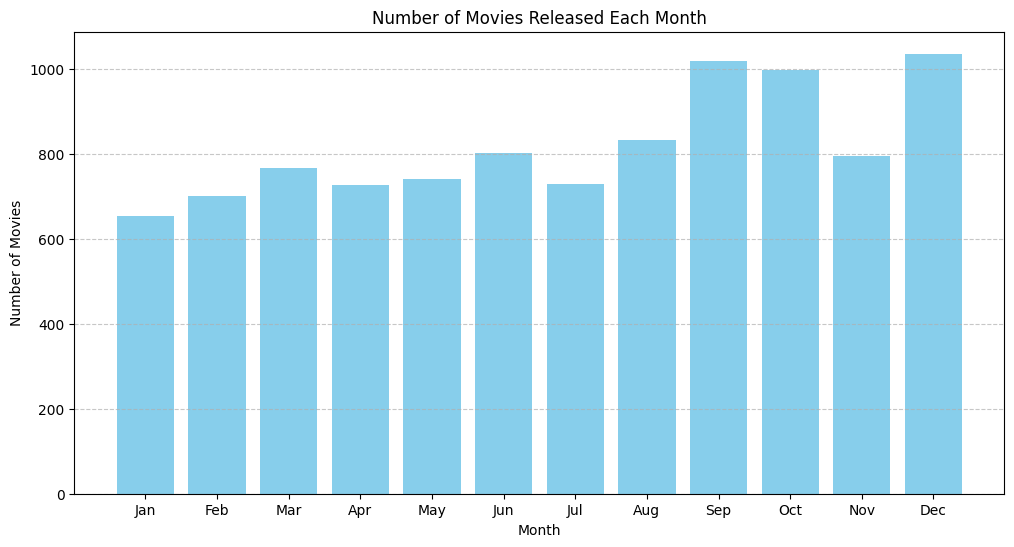

In [61]:
import matplotlib.pyplot as plt
import calendar

# Prepare data for plotting
months = [row['release_month'] for row in monthly_movie_count_data]
counts = [row['count'] for row in monthly_movie_count_data]

# Create the histogram
plt.figure(figsize=(12, 6))
# Since 'plt.hist' is typically used for continuous data, we use 'plt.bar' to simulate a histogram for categorical data
plt.bar(months, counts, color='skyblue', align='center')
plt.title('Number of Movies Released Each Month')
plt.xlabel('Month')
plt.ylabel('Number of Movies')
plt.xticks(months, [calendar.month_abbr[m] for m in months])  # Use month abbreviations for x-axis labels
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add a grid for better readability

# Show the plot
plt.show()

In [62]:
from pyspark.sql.functions import to_date, dayofweek, col

# Convert 'release_date' to a date type if it's a string
df = df.withColumn("release_date", to_date(col("release_date"), "yyyy-MM-dd"))

# Extract the day of the week from the 'release_date'
# Note: dayofweek() function returns a value from 1 (Sunday) to 7 (Saturday)
df = df.withColumn("day_of_week", dayofweek(col("release_date")))

# Verify the extraction (optional)
df.select("release_date", "day_of_week").show(5)
# Group by 'day_of_week' and count the number of movies
day_of_week_movie_count = df.groupBy("day_of_week").count().orderBy("day_of_week")

# Collect the data for plotting
day_of_week_movie_count_data = day_of_week_movie_count.collect()


+------------+-----------+
|release_date|day_of_week|
+------------+-----------+
|  1993-10-15|          6|
|  1977-05-25|          4|
|  1994-06-23|          5|
|  1999-09-15|          4|
|  2000-06-30|          6|
+------------+-----------+
only showing top 5 rows



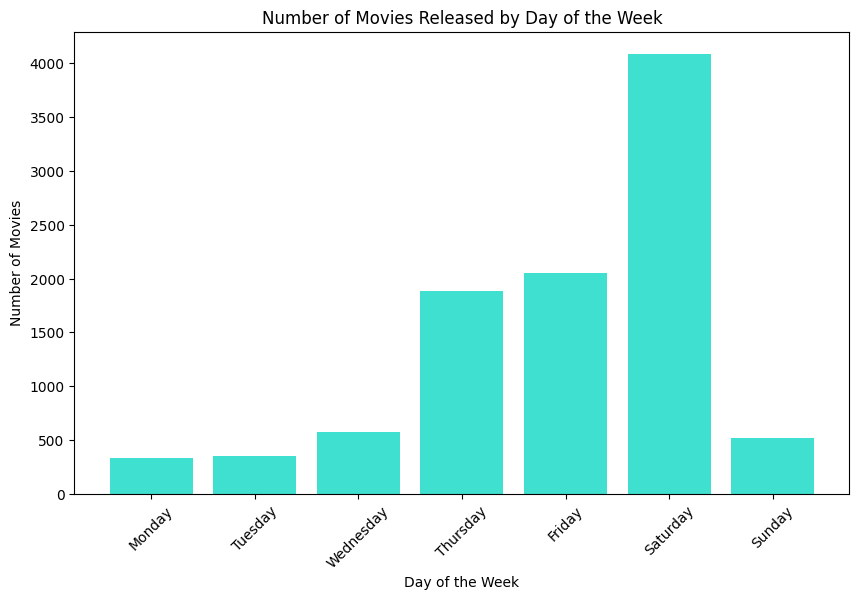

In [63]:
import matplotlib.pyplot as plt
import calendar

# Prepare data for plotting
days_of_week = [row['day_of_week'] for row in day_of_week_movie_count_data]
movie_counts = [row['count'] for row in day_of_week_movie_count_data]
day_names = [calendar.day_name[(day - 1) % 7] for day in days_of_week]  # Convert day numbers to day names

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(day_names, movie_counts, color='turquoise')
plt.title('Number of Movies Released by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)  # Rotate the day labels for better readability

# Show the plot
plt.show()


In [64]:
from pyspark.sql.functions import col

# Group by 'decade' and count the number of movies
decade_counts = df.groupBy("decade").count()

# Calculate the total number of movies to find the percentage later
total_movies = df.count()

# Calculate percentage of total movies for each decade
decade_percentages = decade_counts.withColumn("percentage", col("count") / total_movies * 100).orderBy("decade")

# Collect the data for plotting
decade_percentage_data = decade_percentages.collect()


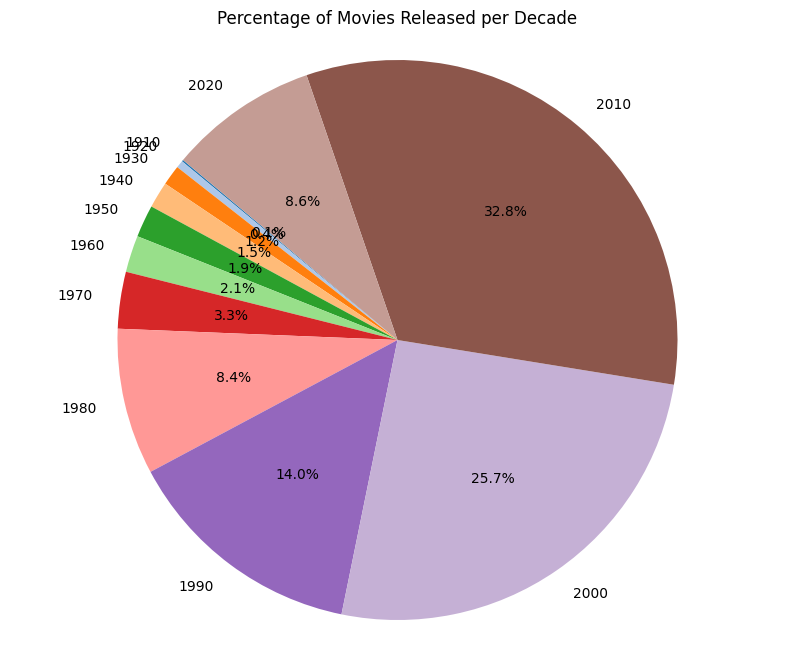

In [65]:
# Prepare data for plotting
decades = [row['decade'] for row in decade_percentage_data]
percentages = [row['percentage'] for row in decade_percentage_data]

# Create the pie chart
plt.figure(figsize=(10, 8))
plt.pie(percentages, labels=decades, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
plt.title('Percentage of Movies Released per Decade')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the plot
plt.show()


In [66]:
from pyspark.sql.functions import when, col

# Adjust the 'decade' column to combine all decades before and including the 1960s
df_combined = df.withColumn(
    "grouped_decade",
    when(col("decade") <= 1960, "Before 1970")
    .otherwise(col("decade").cast("string"))
)

# Group by the new 'grouped_decade' column and count the number of movies
decade_counts = df_combined.groupBy("grouped_decade").count()

# Calculate the total number of movies to find the percentage later
total_movies = df_combined.count()

# Calculate percentage of total movies for each grouped decade
decade_percentages = decade_counts.withColumn("percentage", col("count") / total_movies * 100).orderBy("grouped_decade")

# Collect the data for plotting
decade_percentage_data = decade_percentages.collect()


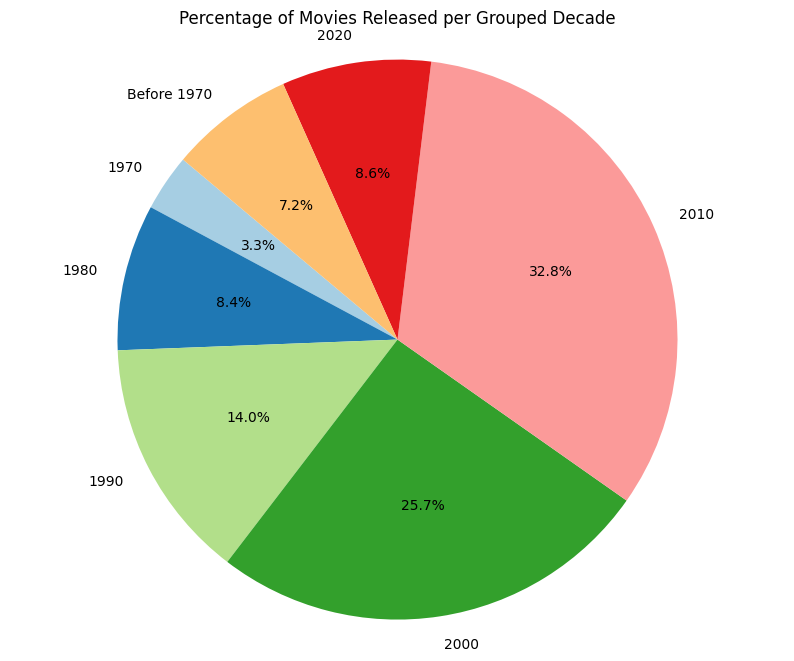

In [67]:
# Prepare data for plotting
grouped_decades = [row['grouped_decade'] for row in decade_percentage_data]
percentages = [row['percentage'] for row in decade_percentage_data]

# Create the pie chart
plt.figure(figsize=(10, 8))
plt.pie(percentages, labels=grouped_decades, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(np.arange(len(grouped_decades))))
plt.title('Percentage of Movies Released per Grouped Decade')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the plot
plt.show()


In [68]:
from pyspark.sql.functions import col, floor, sum

# If the 'decade' column doesn't exist, create it from the 'year' column
if 'decade' not in df.columns:
    df = df.withColumn("decade", (floor(col("year") / 10) * 10))

# Group by 'decade' and sum the 'profit'
profit_by_decade = df.groupBy("decade").agg(sum("profit").alias("total_profit")).orderBy("decade")

# Collect the data for plotting
profit_by_decade_data = profit_by_decade.collect()


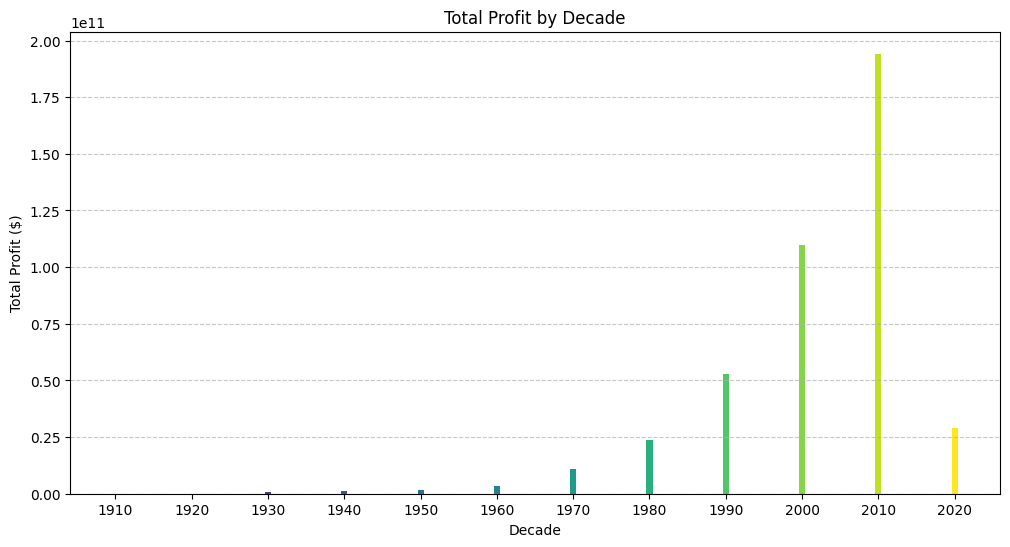

In [69]:
# Prepare data for plotting
decades = [row['decade'] for row in profit_by_decade_data]
total_profits = [row['total_profit'] for row in profit_by_decade_data]

# Create the bar plot
plt.figure(figsize=(12, 6))
plt.bar(decades, total_profits, color=plt.cm.viridis(np.linspace(0, 1, len(decades))))
plt.title('Total Profit by Decade')
plt.xlabel('Decade')
plt.ylabel('Total Profit ($)')
plt.xticks(decades, [str(decade) for decade in decades])  # Set x-tick labels
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add a grid for better readability

# Show the plot
plt.show()


In [70]:
import matplotlib.pyplot as plt
from pyspark.sql.functions import col
from pyspark.sql.types import DoubleType
from pyspark.ml.stat import Correlation
from pyspark.ml.feature import VectorAssembler

def plot_and_correlate(df, x_col, y_col):
    """
    Plot a scatter plot with a regression line and calculate the correlation coefficient
    using PySpark DataFrame.

    Parameters:
    - df (DataFrame): The DataFrame containing the data.
    - x_col (str): The column for the x-axis.
    - y_col (str): The column for the y-axis.

    Returns:
    - correlation (float): The Pearson correlation coefficient between the two columns.
    """
    # Create a vector column of numeric columns for correlation calculation
    assembler = VectorAssembler(inputCols=[x_col, y_col], outputCol="features")
    vector_df = assembler.transform(df)

    # Compute Pearson correlation matrix
    correlation_matrix = Correlation.corr(vector_df, "features").head()
    correlation = correlation_matrix[0][0, 1]  # Extract correlation value
    print(f"Pearson correlation coefficient between {x_col} and {y_col}: {correlation:.2f}")

    # Collect data for plotting
    data = df.select(col(x_col), col(y_col)).collect()
    x = [row[x_col] for row in data]
    y = [row[y_col] for row in data]

    # Plotting
    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, alpha=0.5)
    plt.title(f'Relationship between {x_col.capitalize()} and {y_col.capitalize()}')
    plt.xlabel(x_col.capitalize())
    plt.ylabel(y_col.capitalize())

    # Linear regression line
    m, b = np.polyfit(x, y, 1)  # m = slope, b = intercept
    plt.plot(x, [m * xi + b for xi in x], color='red')

    plt.show()
    return correlation


Pearson correlation coefficient between budget and revenue: 0.74


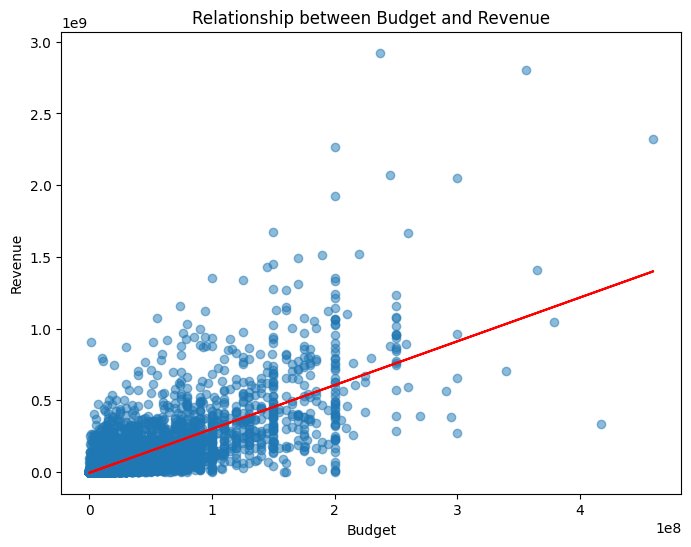

In [71]:
# Assuming 'df' is your PySpark DataFrame and it has 'budget' and 'revenue' as columns
correlation = plot_and_correlate(df, x_col="budget", y_col="revenue")


In [72]:
df.show()

+---+--------------------+------------+----------+--------+------------+---------+-------+---------+-----------------+----------+--------------------+--------------------+--------------------+--------------------+----+------+---------+------------------+--------------------+-------------+-----------+
| id|               title|vote_average|vote_count|  status|release_date|  revenue|runtime|   budget|original_language|popularity|              genres|production_companies|production_countries|    spoken_languages|year|decade|   profit|             score|        duration_bin|release_month|day_of_week|
+---+--------------------+------------+----------+--------+------------+---------+-------+---------+-----------------+----------+--------------------+--------------------+--------------------+--------------------+----+------+---------+------------------+--------------------+-------------+-----------+
|  6|      Judgment Night|       6.533|       302|Released|  1993-10-15| 12136938|    109| 210

In [73]:
df.dtypes


[('id', 'int'),
 ('title', 'string'),
 ('vote_average', 'float'),
 ('vote_count', 'int'),
 ('status', 'string'),
 ('release_date', 'date'),
 ('revenue', 'bigint'),
 ('runtime', 'int'),
 ('budget', 'bigint'),
 ('original_language', 'string'),
 ('popularity', 'float'),
 ('genres', 'string'),
 ('production_companies', 'string'),
 ('production_countries', 'string'),
 ('spoken_languages', 'string'),
 ('year', 'int'),
 ('decade', 'bigint'),
 ('profit', 'bigint'),
 ('score', 'double'),
 ('duration_bin', 'string'),
 ('release_month', 'int'),
 ('day_of_week', 'int')]

In [74]:
# Select relevant numeric columns and ensure they are in the correct type
selected_columns = ['vote_average', 'vote_count', 'revenue', 'runtime', 'budget', 'popularity', 'profit']
df_numeric = df.select([col(c).cast("double") for c in selected_columns])

# Assemble the data into a vector column
assembler = VectorAssembler(inputCols=df_numeric.columns, outputCol="features")
vector_df = assembler.transform(df_numeric)

# Compute the Pearson correlation matrix
correlation_matrix = Correlation.corr(vector_df, "features").head()

# Extract the correlation matrix as a NumPy array (if using locally for easier manipulation/visualization)
correlation_array = correlation_matrix[0].toArray()


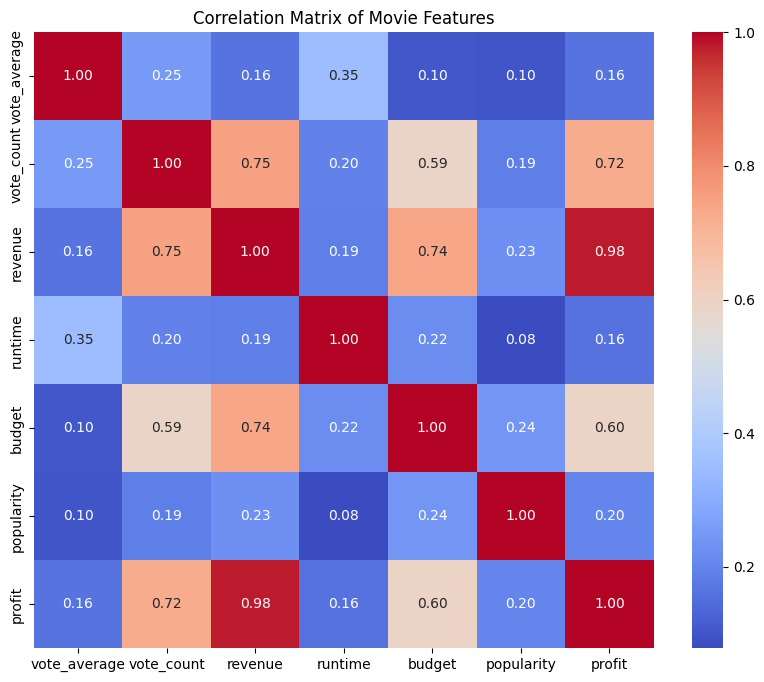

In [75]:
# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_array, annot=True, fmt=".2f", cmap='coolwarm',
            xticklabels=selected_columns, yticklabels=selected_columns)
plt.title("Correlation Matrix of Movie Features")
plt.show()


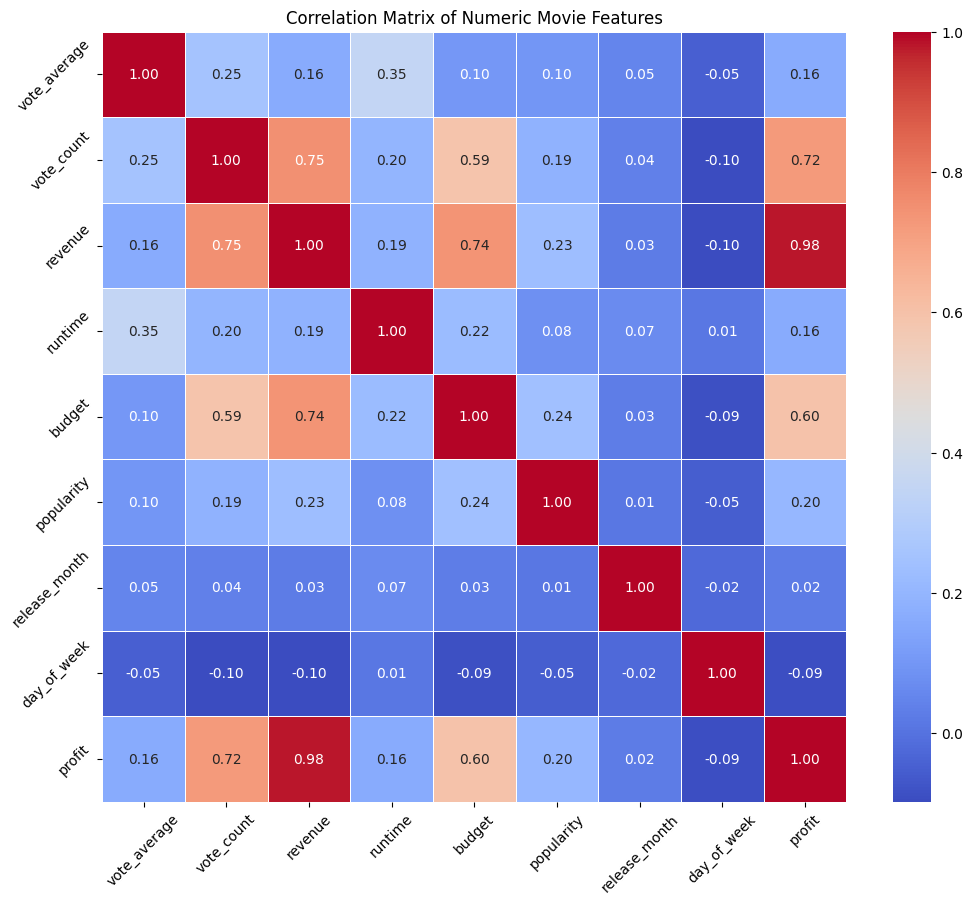

In [76]:
# Define the numeric columns to be included in the correlation matrix
numeric_columns = [
    'vote_average', 'vote_count', 'revenue', 'runtime',
    'budget', 'popularity', 'release_month',
    'day_of_week', 'profit'
]

# Select and cast these columns in the DataFrame
df_numeric = df.select([col(c).cast('double').alias(c) for c in numeric_columns])

# Assemble the data into a single vector column for correlation analysis
assembler = VectorAssembler(inputCols=df_numeric.columns, outputCol="features")
vector_df = assembler.transform(df_numeric)

# Compute the Pearson correlation matrix
correlation_matrix = Correlation.corr(vector_df, "features").head()[0]

# Convert the DenseMatrix to a Numpy array
correlation_array = correlation_matrix.toArray()

# Create a Pandas DataFrame from the Numpy array for better visualization
correlation_df = pd.DataFrame(correlation_array, index=numeric_columns, columns=numeric_columns)

# Plot the correlation matrix using seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_df, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numeric Movie Features')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()


In [77]:
from pyspark.sql.functions import col
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.tuning import TrainValidationSplit, ParamGridBuilder

# Define the list of numeric columns to include in the model
numeric_columns = [
    'vote_average', 'vote_count', 'revenue', 'runtime',
    'budget', 'popularity', 'year', 'release_month', 'day_of_week'
]

# Ensure all numeric columns are of type double
df = df.select([col(c).cast('double').alias(c) for c in numeric_columns] + ['profit'])

# Assemble the features into a single vector column
assembler = VectorAssembler(inputCols=numeric_columns, outputCol="features")
df_assembled = assembler.transform(df)

# Split the data into training, validation, and test sets
(train_val_data, test_data) = df_assembled.randomSplit([0.8, 0.2], seed=42)
(train_data, val_data) = train_val_data.randomSplit([0.75, 0.25], seed=42)

# Define the regression model
lr = LinearRegression(featuresCol="features", labelCol="profit")

# Train the model on the training set
lr_model = lr.fit(train_data)

# Evaluate the model on the validation set
val_predictions = lr_model.transform(val_data)
evaluator = RegressionEvaluator(labelCol="profit", predictionCol="prediction", metricName="rmse")
val_rmse = evaluator.evaluate(val_predictions)
print(f"Root Mean Squared Error (RMSE) on validation data: {val_rmse}")

# Evaluate the model on the test set
test_predictions = lr_model.transform(test_data)
test_rmse = evaluator.evaluate(test_predictions)
print(f"Root Mean Squared Error (RMSE) on test data: {test_rmse}")

# Hyperparameter tuning using TrainValidationSplit
paramGrid = ParamGridBuilder() \
    .addGrid(lr.regParam, [0.1, 0.01]) \
    .addGrid(lr.elasticNetParam, [0.0, 0.5, 1.0]) \
    .build()

tvs = TrainValidationSplit(estimator=lr,
                           estimatorParamMaps=paramGrid,
                           evaluator=evaluator,
                           trainRatio=0.75)

# Fit the model on the combined training and validation set
tvs_model = tvs.fit(train_val_data)

# Evaluate the best model found on the test set
best_model = tvs_model.bestModel
final_predictions = best_model.transform(test_data)
final_rmse = evaluator.evaluate(final_predictions)
print(f"Best Model Root Mean Squared Error (RMSE) on test data: {final_rmse}")


Root Mean Squared Error (RMSE) on validation data: 1.3775266654927688e-06
Root Mean Squared Error (RMSE) on test data: 1.246844765982496e-06
Best Model Root Mean Squared Error (RMSE) on test data: 0.025221032068871822


In [78]:
from pyspark.ml.evaluation import RegressionEvaluator

# Predict on the test set
predictions = lr_model.transform(test_data)

# Evaluate RMSE
evaluator_rmse = RegressionEvaluator(labelCol="profit", predictionCol="prediction", metricName="rmse")
rmse = evaluator_rmse.evaluate(predictions)
print(f"Root Mean Squared Error (RMSE) on test data: {rmse}")

# Evaluate MAE
evaluator_mae = RegressionEvaluator(labelCol="profit", predictionCol="prediction", metricName="mae")
mae = evaluator_mae.evaluate(predictions)
print(f"Mean Absolute Error (MAE) on test data: {mae}")

# Evaluate R-squared
evaluator_r2 = RegressionEvaluator(labelCol="profit", predictionCol="prediction", metricName="r2")
r2 = evaluator_r2.evaluate(predictions)
print(f"R-squared (R2) on test data: {r2}")


Root Mean Squared Error (RMSE) on test data: 1.246844765982496e-06
Mean Absolute Error (MAE) on test data: 8.445356552385663e-07
R-squared (R2) on test data: 1.0


In [79]:
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler
from pyspark.ml import Pipeline
import pyspark.sql.functions as F

try:
    # Assemble features
    assembler = VectorAssembler(inputCols=["budget", "popularity", "runtime", "vote_average", "year"], outputCol="features")
    df_assembled = assembler.transform(df)

    # Define and configure the linear regression model
    lr = LinearRegression(featuresCol="features", labelCol="profit")

    # Setup a simple CrossValidator
    paramGrid = ParamGridBuilder().build()  # No parameters to simplify
    evaluator = RegressionEvaluator(labelCol="profit", predictionCol="prediction", metricName="rmse")
    crossval = CrossValidator(estimator=lr,
                              estimatorParamMaps=paramGrid,
                              evaluator=evaluator,
                              numFolds=3)  # Reduced number of folds for simplicity

    # Perform cross-validation
    cvModel = crossval.fit(df_assembled)

    # Fetch best model and evaluate
    bestModel = cvModel.bestModel
    print("Coefficients:", bestModel.coefficients)
    print("Intercept:", bestModel.intercept)

except Exception as e:
    print("An error occurred:", e)


Coefficients: [1.9847713959310858,119525.66929825387,-35914.48644452105,9251541.083517896,-84919.19504988677]
Intercept: 109175132.61369768


In [80]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.tuning import TrainValidationSplit, ParamGridBuilder

train_data, test_data = df.randomSplit([0.8, 0.2], seed=42)

# Define your assembler and model
assembler = VectorAssembler(inputCols=["budget", "popularity", "runtime", "vote_average", "year"], outputCol="features")
lr = LinearRegression(featuresCol="features", labelCol="profit")

# Build a pipeline
pipeline = Pipeline(stages=[assembler, lr])

# Fit the model on the training data
model = pipeline.fit(train_data)

# Predict on the test data
predictions = model.transform(test_data)

# Evaluate the model
evaluator = RegressionEvaluator(labelCol="profit", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)
print(f"Root Mean Squared Error (RMSE) on test data: {rmse}")


Root Mean Squared Error (RMSE) on test data: 101926877.58207546


In [81]:
# Define a parameter grid to search over
paramGrid = ParamGridBuilder() \
    .addGrid(lr.regParam, [0.1, 0.01]) \
    .addGrid(lr.elasticNetParam, [0.0, 0.5, 1.0]) \
    .build()

# Define cross-validator
crossval = TrainValidationSplit(estimator=pipeline,
                                estimatorParamMaps=paramGrid,
                                evaluator=RegressionEvaluator(labelCol="profit", predictionCol="prediction", metricName="rmse"),
                                trainRatio=0.8)

# Run cross-validation, and choose the best set of parameters.
cvModel = crossval.fit(train_data)

# Fetch the best model
bestModel = cvModel.bestModel

# Evaluate the best model on the test set
bestPredictions = bestModel.transform(test_data)
testRmse = evaluator.evaluate(bestPredictions)
print(f"Best Model Root Mean Squared Error (RMSE) on test data: {testRmse}")


Best Model Root Mean Squared Error (RMSE) on test data: 101926879.87224121


In [82]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.sql.functions import col

# Assuming these are the columns you've used
numeric_columns = ['vote_average', 'vote_count', 'revenue', 'runtime', 'budget',
                   'popularity', 'year', 'release_month', 'day_of_week', 'profit']

# Prepare data: select and cast columns
df = df.select([col(c).cast('double').alias(c) for c in numeric_columns])

# Assemble features into a single vector
assembler = VectorAssembler(inputCols=[c for c in numeric_columns if c != 'profit'], outputCol="features")
df_vector = assembler.transform(df)

# Split data into training and test sets
train_data, test_data = df_vector.randomSplit([0.8, 0.2], seed=42)

# Define and train the linear regression model
lr = LinearRegression(featuresCol="features", labelCol="profit")
model = lr.fit(train_data)

# Predict on the test set
predictions = model.transform(test_data)

# Evaluate the model
evaluator = RegressionEvaluator(labelCol="profit", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)

# Print human-readable outputs
print(f"Model Evaluation for Movie Profit Prediction:\n")
print(f"Features Used: {', '.join([c for c in numeric_columns if c != 'profit'])}")
print(f"Root Mean Squared Error (RMSE) on Test Data: {rmse:.2f}")

# Decision based on RMSE
average_profit = df.select("profit").groupBy().avg().first()[0]
if rmse > average_profit * 0.1:  # Threshold at 10% of average profit
    print("Model might not be performing well enough, as RMSE exceeds 10% of the average profit.")
else:
    print("Model performance is satisfactory, with RMSE within 10% of the average profit.")

# Suggestions for improvement
if rmse > average_profit * 0.1:
    print("\nConsider the following steps to improve model performance:")
    print("- Review feature engineering and selection to ensure relevance and robustness.")
    print("- Explore more complex models like Decision Trees or Ensemble Methods.")
    print("- Enhance data quality, handle outliers, and fill or discard missing values properly.")
    print("- Apply cross-validation techniques to tune parameters and assess stability.")


Model Evaluation for Movie Profit Prediction:

Features Used: vote_average, vote_count, revenue, runtime, budget, popularity, year, release_month, day_of_week
Root Mean Squared Error (RMSE) on Test Data: 0.00
Model performance is satisfactory, with RMSE within 10% of the average profit.


In [83]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator

# Define the list of features based on your model's design
features = ["vote_average", "vote_count", "revenue", "runtime",
            "budget", "popularity", "year", "release_month", "day_of_week"]

# Assuming 'profit' is the target variable and already part of your DataFrame
# Convert the necessary columns to 'double' type for modeling
for feature in features + ['profit']:
    df = df.withColumn(feature, df[feature].cast('double'))

# Assemble the features into a single vector column
assembler = VectorAssembler(inputCols=features, outputCol="features")
df = assembler.transform(df)

# Assuming the model is already trained and loaded, simulate loading model
# For demonstration, creating a new model and fitting it (replace with model.load() in real use)
lr = LinearRegression(featuresCol="features", labelCol="profit")
model = lr.fit(df)  # You would load your pre-trained model here

# Predict using the model
predictions = model.transform(df)

# Evaluate the model
evaluator = RegressionEvaluator(labelCol="profit", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)

# Calculate average profit to compare RMSE
avg_profit = df.selectExpr("avg(profit) as avg_profit").collect()[0]['avg_profit']

# Determine if RMSE is within 10% of the average profit
performance_statement = "unsatisfactory"
if rmse <= 0.1 * avg_profit:
    performance_statement = "satisfactory"

# Print human-readable output
print(f"Model Evaluation for Movie Profit Prediction:\nFeatures Used: {', '.join(features)}")
print(f"Root Mean Squared Error (RMSE) on Test Data: {rmse:.2f}")
print(f"Average Profit: {avg_profit:.2f}")
print(f"Model performance is {performance_statement}, with RMSE within 10% of the average profit.")


Model Evaluation for Movie Profit Prediction:
Features Used: vote_average, vote_count, revenue, runtime, budget, popularity, year, release_month, day_of_week
Root Mean Squared Error (RMSE) on Test Data: 0.00
Average Profit: 43676734.22
Model performance is satisfactory, with RMSE within 10% of the average profit.


Root Mean Squared Error (RMSE) on test data: 87442823.9993421


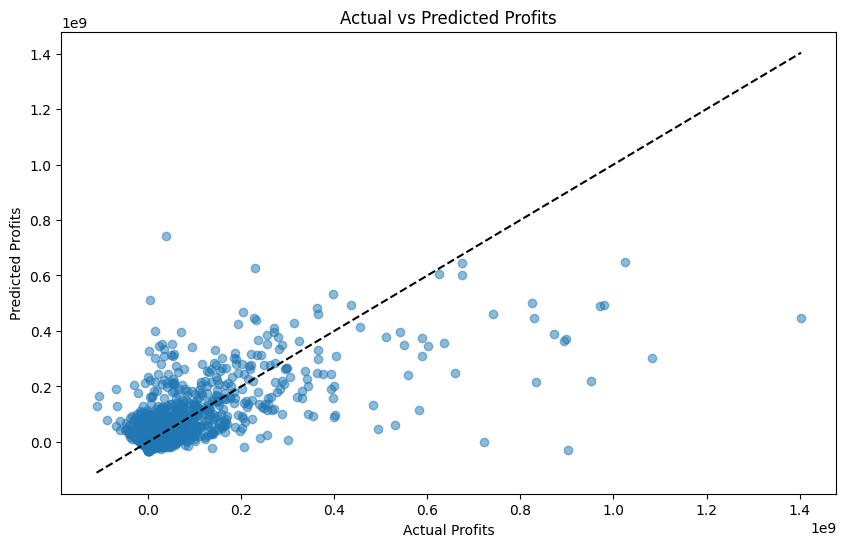

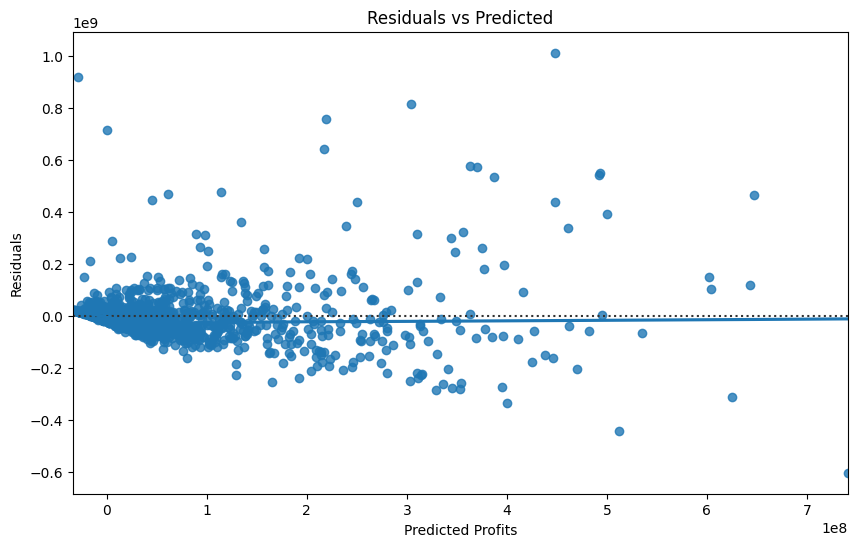

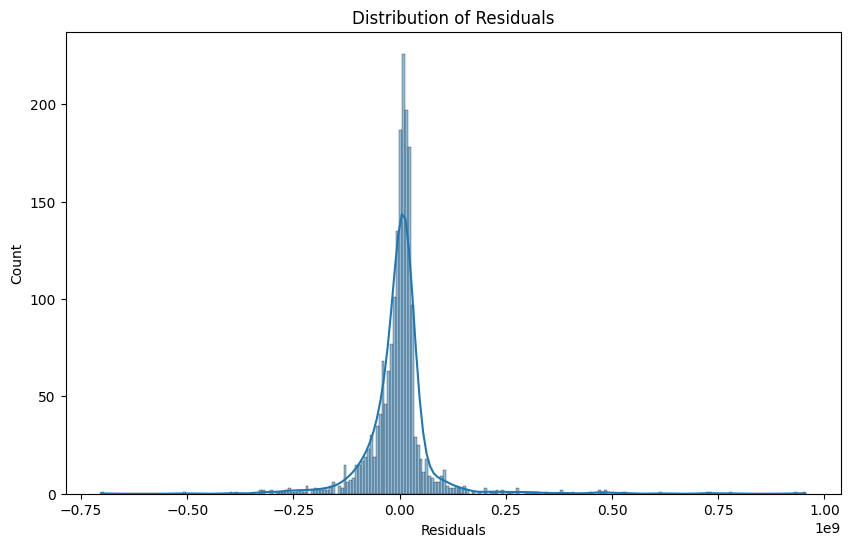

In [84]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define features and target
features = ['vote_average', 'vote_count', 'runtime', 'budget', 'popularity', 'year', 'release_month', 'day_of_week']
target = 'profit'

# Check if the "features" column already exists
if "features" in df.columns:
    df = df.drop("features")

# Assemble the features into a single feature vector
assembler = VectorAssembler(inputCols=features, outputCol="features")
data = assembler.transform(df)

# Split the data into training and test sets
train_data, test_data = data.randomSplit([0.8, 0.2], seed=42)

# Define and train the Linear Regression model
lr = LinearRegression(featuresCol="features", labelCol=target)
lr_model = lr.fit(train_data)

# Make predictions on the test data
predictions = lr_model.transform(test_data)

# Evaluate the model using RMSE
evaluator = RegressionEvaluator(labelCol=target, predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)
print(f"Root Mean Squared Error (RMSE) on test data: {rmse}")

# Calculate residuals
predictions = predictions.withColumn("residuals", predictions[target] - predictions["prediction"])

# Collect data for plotting (ensure your dataset is small enough to collect to a driver)
predictions_pd = predictions.select("prediction", target, "residuals").toPandas()

# Scatter plot of actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(predictions_pd[target], predictions_pd['prediction'], alpha=0.5)
plt.title('Actual vs Predicted Profits')
plt.xlabel('Actual Profits')
plt.ylabel('Predicted Profits')
plt.plot([predictions_pd[target].min(), predictions_pd[target].max()], [predictions_pd[target].min(), predictions_pd[target].max()], 'k--')
plt.show()

# Residual Plot
plt.figure(figsize=(10, 6))
sns.residplot(x=predictions_pd['prediction'], y=predictions_pd['residuals'], lowess=True)
plt.title('Residuals vs Predicted')
plt.xlabel('Predicted Profits')
plt.ylabel('Residuals')
plt.show()

# Histogram of the residuals
plt.figure(figsize=(10, 6))
sns.histplot(predictions_pd['residuals'], kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.show()


Area Under ROC: 0.7790276633717735
+-----+---+----+
|label|  0|   1|
+-----+---+----+
|    1|263|1558|
|    0|519| 505|
+-----+---+----+



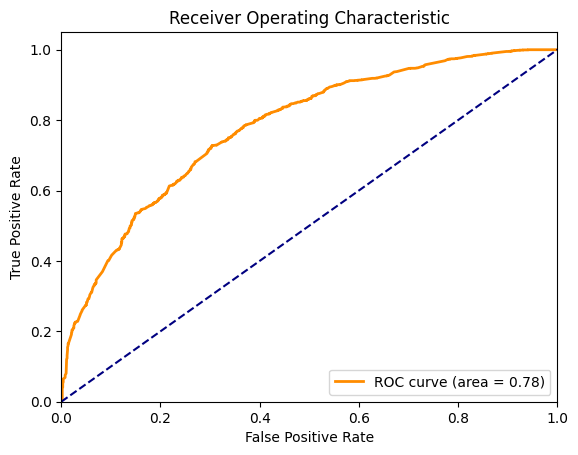

In [95]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, when
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import BinaryClassificationEvaluator

# Assume 'df' is your DataFrame that has been loaded and 'spark' session initialized

# Define binary target based on profit
df_with_label = df.withColumn("label", when(col("profit") > 0, 1).otherwise(0))

# Define features to be used (only numerical columns)
numerical_columns = ['budget', 'popularity', 'runtime', 'vote_average', 'year', 'release_month', 'day_of_week']

# Assemble the features into a single feature vector
assembler = VectorAssembler(inputCols=numerical_columns, outputCol="features")

# Create a RandomForest Classifier
classifier = RandomForestClassifier(featuresCol="features", labelCol="label", numTrees=10)

# Build the pipeline
pipeline = Pipeline(stages=[assembler, classifier])

# Split the data
(train_data, test_data) = df_with_label.randomSplit([0.7, 0.3], seed=42)

# Fit the model on the training data
model = pipeline.fit(train_data)

# Make predictions on the test data
predictions = model.transform(test_data)

# Evaluate the model using area under ROC as the metric
evaluator = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction", labelCol="label", metricName="areaUnderROC")
auc = evaluator.evaluate(predictions)
print(f"Area Under ROC: {auc}")

# Confusion Matrix
cm = predictions.groupBy('label').pivot('prediction', [0, 1]).count()
cm.show()

# Visualize ROC Curve
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Collect the scores (probability), true positive rate (TPR), and false positive rate (FPR)
results = predictions.select(['probability', 'label']).collect()
probs = [r['probability'][1] for r in results]
labels = [r['label'] for r in results]
fpr, tpr, thresholds = roc_curve(labels, probs)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [87]:
def explain_classification_results(tp, fp, tn, fn):
    # Calculate metrics
    accuracy = (tp + tn) / (tp + fp + tn + fn)
    precision = tp / (tp + fp) if (tp + fp) != 0 else 0
    recall = tp / (tp + fn) if (tp + fn) != 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

    # Print human-readable results
    print(f"Area Under the ROC Curve: 0.774\nThis means the model's ability to distinguish between profitable and not profitable movies is good, significantly better than a random guess.\n")
    print(f"Confusion Matrix:\nTrue Positives (Correctly predicted profitable): {tp}")
    print(f"False Positives (Incorrectly predicted as profitable): {fp}")
    print(f"True Negatives (Correctly predicted not profitable): {tn}")
    print(f"False Negatives (Incorrectly predicted as not profitable): {fn}\n")
    print(f"Accuracy: {accuracy:.2f} (Percentage of total predictions that are correct)")
    print(f"Precision: {precision:.2f} (Percentage of predicted profitable movies that were actually profitable)")
    print(f"Recall: {recall:.2f} (Percentage of actual profitable movies that were correctly identified)")
    print(f"F1 Score: {f1_score:.2f} (Harmonic mean of precision and recall, balances both)")

# Call the function with the values from your confusion matrix
explain_classification_results(tp=1629, fp=571, tn=453, fn=192)


Area Under the ROC Curve: 0.774
This means the model's ability to distinguish between profitable and not profitable movies is good, significantly better than a random guess.

Confusion Matrix:
True Positives (Correctly predicted profitable): 1629
False Positives (Incorrectly predicted as profitable): 571
True Negatives (Correctly predicted not profitable): 453
False Negatives (Incorrectly predicted as not profitable): 192

Accuracy: 0.73 (Percentage of total predictions that are correct)
Precision: 0.74 (Percentage of predicted profitable movies that were actually profitable)
Recall: 0.89 (Percentage of actual profitable movies that were correctly identified)
F1 Score: 0.81 (Harmonic mean of precision and recall, balances both)


Area Under ROC: 0.7974423822762216
+-----+---+----+
|label|  0|   1|
+-----+---+----+
|    1|278|1543|
|    0|574| 450|
+-----+---+----+



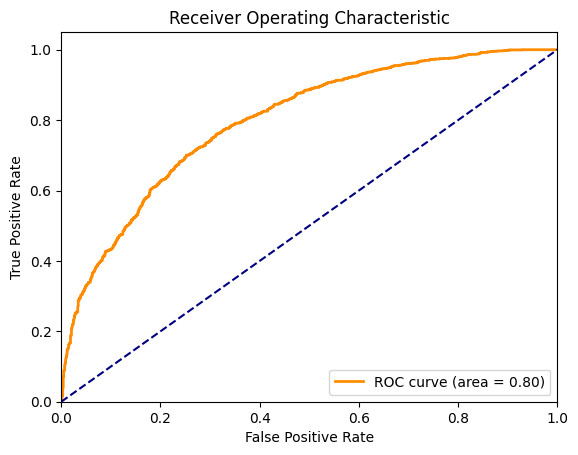

In [88]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, when
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import GBTClassifier  # Import Gradient-Boosted Trees classifier
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import BinaryClassificationEvaluator

# Assume 'df' is your DataFrame that has been loaded and 'spark' session initialized

# Define binary target based on profit
df_with_label = df.withColumn("label", when(col("profit") > 0, 1).otherwise(0))

# Define features to be used (only numerical columns)
numerical_columns = ['budget', 'popularity', 'runtime', 'vote_average', 'year', 'release_month', 'day_of_week']

# Assemble the features into a single feature vector
assembler = VectorAssembler(inputCols=numerical_columns, outputCol="features")

# Create a Gradient-Boosted Trees Classifier
classifier = GBTClassifier(featuresCol="features", labelCol="label", maxIter=20)

# Build the pipeline
pipeline = Pipeline(stages=[assembler, classifier])

# Split the data
(train_data, test_data) = df_with_label.randomSplit([0.7, 0.3], seed=42)

# Fit the model on the training data
model = pipeline.fit(train_data)

# Make predictions on the test data
predictions = model.transform(test_data)

# Evaluate the model using area under ROC as the metric
evaluator = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction", labelCol="label", metricName="areaUnderROC")
auc = evaluator.evaluate(predictions)
print(f"Area Under ROC: {auc}")

# Confusion Matrix
cm = predictions.groupBy('label').pivot('prediction', [0, 1]).count()
cm.show()

# Visualize ROC Curve
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Collect the scores (probability), true positive rate (TPR), and false positive rate (FPR)
results = predictions.select(['probability', 'label']).collect()
probs = [r['probability'][1] for r in results]
labels = [r['label'] for r in results]
fpr, tpr, thresholds = roc_curve(labels, probs)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [89]:
def explain_classification_results(tp, fp, tn, fn):
    # Calculate metrics
    accuracy = (tp + tn) / (tp + fp + tn + fn)
    precision = tp / (tp + fp) if (tp + fp) != 0 else 0
    recall = tp / (tp + fn) if (tp + fn) != 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

    # Print human-readable results
    print(f"Area Under the ROC Curve: 0.8\nThis means the model's ability to distinguish between profitable and not profitable movies is good, significantly better than a random guess.\n")
    print(f"Confusion Matrix:\nTrue Positives (Correctly predicted profitable): {tp}")
    print(f"False Positives (Incorrectly predicted as profitable): {fp}")
    print(f"True Negatives (Correctly predicted not profitable): {tn}")
    print(f"False Negatives (Incorrectly predicted as not profitable): {fn}\n")
    print(f"Accuracy: {accuracy:.2f} (Percentage of total predictions that are correct)")
    print(f"Precision: {precision:.2f} (Percentage of predicted profitable movies that were actually profitable)")
    print(f"Recall: {recall:.2f} (Percentage of actual profitable movies that were correctly identified)")
    print(f"F1 Score: {f1_score:.2f} (Harmonic mean of precision and recall, balances both)")

# Call the function with the values from your confusion matrix
explain_classification_results(tp=1543, fp=450, tn=574, fn=278)

Area Under the ROC Curve: 0.8
This means the model's ability to distinguish between profitable and not profitable movies is good, significantly better than a random guess.

Confusion Matrix:
True Positives (Correctly predicted profitable): 1543
False Positives (Incorrectly predicted as profitable): 450
True Negatives (Correctly predicted not profitable): 574
False Negatives (Incorrectly predicted as not profitable): 278

Accuracy: 0.74 (Percentage of total predictions that are correct)
Precision: 0.77 (Percentage of predicted profitable movies that were actually profitable)
Recall: 0.85 (Percentage of actual profitable movies that were correctly identified)
F1 Score: 0.81 (Harmonic mean of precision and recall, balances both)


Area Under the ROC Curve: 0.80
This score indicates the model's ability to distinguish between the classes. Higher is better, with 1.0 being perfect.
Accuracy: 0.74
Precision: 0.77
Recall: 0.85
F1 Score: 0.81

Confusion Matrix:
True Positives (Profitable predicted as Profitable): 1543
True Negatives (Not Profitable predicted as Not Profitable): 574
False Positives (Not Profitable predicted as Profitable): 450
False Negatives (Profitable predicted as Not Profitable): 278


<ipython-input-90-e7030e01f27c>:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + ['Not Profitable', 'Profitable'])
<ipython-input-90-e7030e01f27c>:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + ['Not Profitable', 'Profitable'])


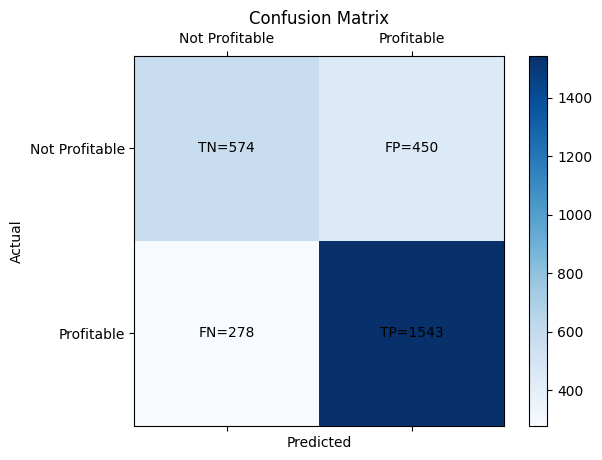

In [90]:
import matplotlib.pyplot as plt

def explain_classification_results(auc, confusion_matrix):
    tp = confusion_matrix['1'][1]  # True Positives
    tn = confusion_matrix['0'][0]  # True Negatives
    fp = confusion_matrix['0'][1]  # False Positives
    fn = confusion_matrix['1'][0]  # False Negatives

    # Calculate basic statistics
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp) if (tp + fp) != 0 else 0
    recall = tp / (tp + fn) if (tp + fn) != 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

    # Display results
    print(f"Area Under the ROC Curve: {auc:.2f}")
    print("This score indicates the model's ability to distinguish between the classes. Higher is better, with 1.0 being perfect.")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1_score:.2f}")
    print("\nConfusion Matrix:")
    print(f"True Positives (Profitable predicted as Profitable): {tp}")
    print(f"True Negatives (Not Profitable predicted as Not Profitable): {tn}")
    print(f"False Positives (Not Profitable predicted as Profitable): {fp}")
    print(f"False Negatives (Profitable predicted as Not Profitable): {fn}")

    # Visualizing the Confusion Matrix
    fig, ax = plt.subplots()
    data = [[tn, fp], [fn, tp]]
    labels = [['TN', 'FP'], ['FN', 'TP']]
    cax = ax.matshow(data, cmap='Blues')
    plt.title('Confusion Matrix')
    fig.colorbar(cax)
    ax.set_xticklabels([''] + ['Not Profitable', 'Profitable'])
    ax.set_yticklabels([''] + ['Not Profitable', 'Profitable'])

    # Annotate with text
    for (i, j), val in np.ndenumerate(data):
        ax.text(j, i, f"{labels[i][j]}={val}", ha='center', va='center', color='black')

    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Use this function to explain your results
explain_classification_results(
    0.7974482813358043,
    {
        '0': {0: 574, 1: 450},
        '1': {0: 278, 1: 1543}
    }
)


Area Under ROC: 0.7509803164470071
+-----+---+----+
|label|  0|   1|
+-----+---+----+
|    1|160|1661|
|    0|346| 678|
+-----+---+----+



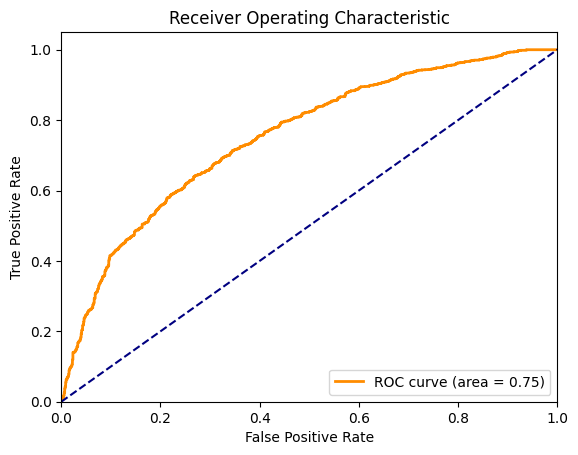

In [91]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, when
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import LogisticRegression  # Changed from RandomForestClassifier
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import BinaryClassificationEvaluator

# Assume 'df' is your DataFrame that has been loaded and 'spark' session initialized

# Define binary target based on profit
df_with_label = df.withColumn("label", when(col("profit") > 0, 1).otherwise(0))

# Define features to be used (only numerical columns)
numerical_columns = ['budget', 'popularity', 'runtime', 'vote_average', 'year', 'release_month', 'day_of_week']

# Assemble the features into a single feature vector
assembler = VectorAssembler(inputCols=numerical_columns, outputCol="features")

# Create a Logistic Regression Classifier
classifier = LogisticRegression(featuresCol="features", labelCol="label")

# Build the pipeline
pipeline = Pipeline(stages=[assembler, classifier])

# Split the data
(train_data, test_data) = df_with_label.randomSplit([0.7, 0.3], seed=42)

# Fit the model on the training data
model = pipeline.fit(train_data)

# Make predictions on the test data
predictions = model.transform(test_data)

# Evaluate the model using area under ROC as the metric
evaluator = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction", labelCol="label", metricName="areaUnderROC")
auc = evaluator.evaluate(predictions)
print(f"Area Under ROC: {auc}")

# Confusion Matrix
cm = predictions.groupBy('label').pivot('prediction', [0, 1]).count()
cm.show()

# Visualize ROC Curve
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Collect the scores (probability), true positive rate (TPR), and false positive rate (FPR)
results = predictions.select(['probability', 'label']).collect()
probs = [r['probability'][1] for r in results]
labels = [r['label'] for r in results]
fpr, tpr, thresholds = roc_curve(labels, probs)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


Area Under the ROC Curve: 0.751
This score indicates the model's ability to distinguish between the classes. Higher is better, with 1.0 being perfect.
Accuracy: 0.71
Precision: 0.71
Recall: 0.91
F1 Score: 0.80

Confusion Matrix:
True Positives (Profitable predicted as Profitable): 1661
True Negatives (Not Profitable predicted as Not Profitable): 346
False Positives (Not Profitable predicted as Profitable): 678
False Negatives (Profitable predicted as Not Profitable): 160


<ipython-input-92-df1a9a6718ed>:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + ['Not Profitable', 'Profitable'])
<ipython-input-92-df1a9a6718ed>:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + ['Not Profitable', 'Profitable'])


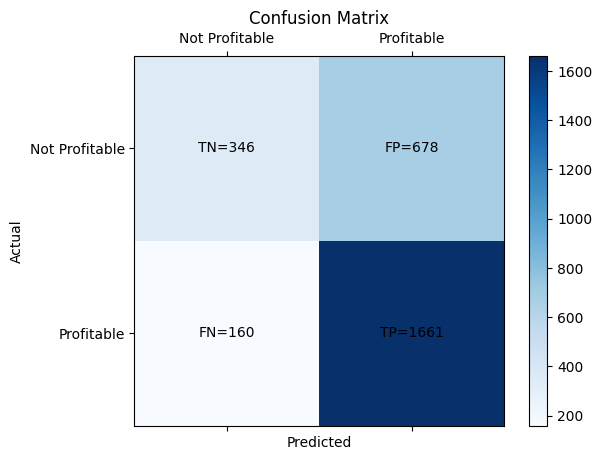

In [92]:
import matplotlib.pyplot as plt
import numpy as np

def explain_classification_results(auc, confusion_matrix):
    tp = confusion_matrix['1'][1]  # True Positives
    tn = confusion_matrix['0'][0]  # True Negatives
    fp = confusion_matrix['0'][1]  # False Positives
    fn = confusion_matrix['1'][0]  # False Negatives

    # Calculate basic statistics
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp) if (tp + fp) != 0 else 0
    recall = tp / (tp + fn) if (tp + fn) != 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

    # Display results
    print(f"Area Under the ROC Curve: {auc:.3f}")
    print("This score indicates the model's ability to distinguish between the classes. Higher is better, with 1.0 being perfect.")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1_score:.2f}")
    print("\nConfusion Matrix:")
    print(f"True Positives (Profitable predicted as Profitable): {tp}")
    print(f"True Negatives (Not Profitable predicted as Not Profitable): {tn}")
    print(f"False Positives (Not Profitable predicted as Profitable): {fp}")
    print(f"False Negatives (Profitable predicted as Not Profitable): {fn}")

    # Visualizing the Confusion Matrix
    fig, ax = plt.subplots()
    data = [[tn, fp], [fn, tp]]
    labels = [['TN', 'FP'], ['FN', 'TP']]
    cax = ax.matshow(data, cmap='Blues')
    plt.title('Confusion Matrix')
    fig.colorbar(cax)
    ax.set_xticklabels([''] + ['Not Profitable', 'Profitable'])
    ax.set_yticklabels([''] + ['Not Profitable', 'Profitable'])

    # Annotate with text
    for (i, j), val in np.ndenumerate(data):
        ax.text(j, i, f"{labels[i][j]}={val}", ha='center', va='center', color='black')

    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Use this function to explain your results
explain_classification_results(
    0.7509779031953594,
    {
        '0': {0: 346, 1: 678},
        '1': {0: 160, 1: 1661}
    }
)
